In [1]:
# Part 1 - Data Preprocessing
# Importing the libraries导入需要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import logging
import joblib

In [2]:
# 读取数据
data = pd.read_csv('data/baoli.csv', skiprows=2) #读取CSV文件,并跳过前两行
# 剔除缺省值
data =data[(data != 0).all(axis=1)]
data.head()

date  open  close  high   low    volume
0  2014/1/2  8.19   8.18  8.26  8.13  32159157
1  2014/1/3  8.13   8.11  8.20  8.05  25517581
2  2014/1/6  8.08   7.65  8.08  7.62  76409223
3  2014/1/7  7.63   7.58  7.70  7.55  40229837
4  2014/1/8  7.60   7.51  7.70  7.45  50442084

In [3]:
#data clean

# Drop the first two rows that contain non-relevant information
data_cleaned = data.drop([0, 1])

# Reset index
data_cleaned.reset_index(drop=True, inplace=True)

# Convert columns to numeric where possible
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_cleaned.dropna(inplace=True)

In [4]:
# Feature Scaling特征归一化，归一化很重要，消除量纲的差异。
from sklearn.preprocessing import MinMaxScaler
all_data = data.iloc[:, 1:6]
sc = MinMaxScaler(feature_range = (0, 1),)
all_data_scaled = sc.fit_transform(all_data)
print(all_data_scaled)
print('训练数据长度是:',len(all_data_scaled))

[[0.23914591 0.22959889 0.22170127 0.24       0.01961069]
 [0.23487544 0.22475795 0.21768252 0.23418182 0.0124647 ]
 [0.23131673 0.19294606 0.20964501 0.20290909 0.06722143]
 ...
 [0.33380783 0.32019364 0.31212324 0.336      0.04640368]
 [0.32953737 0.35200553 0.33757535 0.32872727 0.10666231]
 [0.36085409 0.34854772 0.34293369 0.36290909 0.06622817]]
训练数据长度是: 2427


In [5]:
# Prepare features and labels with a time step of 60
timestep = 60
features = []
labels = []
for i in range(timestep, len(all_data_scaled)):
    features.append(all_data_scaled[i-timestep:i, :])
    labels.append(all_data_scaled[i, 1])  # Using the second column as the label

features, labels = np.array(features), np.array(labels)

# Reshape features for linear regression (flattening)
features = features.reshape(features.shape[0], -1)

# Split the dataset into training, validation, and test sets (8:1:1 ratio)
x_train, x_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.2, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=False)
print('shape of x_train:',x_train.shape)
print('shape of x_val:',x_val.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_val:',y_val.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (1893, 300)
shape of x_val: (237, 300)
shape of x_test: (237, 300)
shape of y_train: (1893,)
shape of y_val: (237,)
shape of y_test: (237,)


In [6]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# Predict on test set
predicted_stock_test = regressor.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(y_test, predicted_stock_test)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mse)
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(y_test, predicted_stock_test)

mape = mean_absolute_percentage_error(y_test, predicted_stock_test)

r2=r2_score(y_test, predicted_stock_test)

# Print evaluation results
print('Linear Regression模型的MSE是: %.6f' % mse)
print('Linear Regression模型的RMSE是: %.6f' % rmse)
print('Linear Regression模型的MAE是: %.6f' % mae)
print('Linear Regression模型的MAPE是: %.6f' % mape)
print('Linear Regression模型的R^2是: %.6f' % r2)

Linear Regression模型的MSE是: 0.000341
Linear Regression模型的RMSE是: 0.018466
Linear Regression模型的MAE是: 0.013948
Linear Regression模型的MAPE是: 0.025185
Linear Regression模型的R^2是: 0.974952


In [8]:
# ------------------------------------------------------------------------------------
# Linear Regression

In [17]:
# Directory containing the data files
data_dir = 'data/'
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# List all CSV files in the data directory
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]
csv_files

['taibao.csv',
 'shenhua.csv',
 'haier.csv',
 'zhongguochuanbo.csv',
 'longji.csv',
 'changjiangdianli.csv',
 'xingyebank.csv',
 'zhongguojianzhu.csv',
 'haitian.csv',
 'baoli.csv',
 'weier.csv',
 'haiguang.csv',
 'shangqi.csv',
 'renshou.csv',
 'pingan.csv',
 'zijin.csv',
 'pianzai.csv',
 'zhongxinzhengquan.csv',
 'wanhua.csv',
 'zhongtie.csv',
 'maotai.csv',
 'yaoming.csv',
 'tebian.csv',
 'dianxin.csv',
 'jinshanbangong.csv',
 'zhongxinguoji.csv',
 'liantong.csv',
 'sanxia.csv',
 'guodiannanrui.csv',
 'changcheng.csv',
 'sanyi.csv',
 'hengrui.csv',
 'zhongmian.csv',
 'beifangxitu.csv',
 'hangfa.csv',
 'yili.csv',
 'yaoyi.csv',
 'nongyebank.csv',
 'tongwei.csv',
 'shanximeiye.csv',
 'zhongyuan.csv',
 'zhaoshangbank.csv',
 'tianhe.csv',
 'zhongguoshiyou.csv',
 'dianjian.csv',
 'gongshangbank.csv',
 'zhongguoshihua.csv',
 'fenjiu.csv',
 'huayou.csv']

In [19]:
# Initialize a DataFrame to store metrics for all files
metrics_summary = pd.DataFrame(columns=['File', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

Processing file: taibao.csv


2024-11-28 22:04:56,034 - INFO - Model saved to taibao.csv_linear_regression_model.pkl
/var/folders/00/gkm48mh93l705vs95w0kvx3r0000gn/T/ipykernel_13136/2870037955.py:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_summary = pd.concat([metrics_summary, pd.DataFrame([{


File: taibao.csv
Linear Regression模型的MSE是: 0.000484
Linear Regression模型的RMSE是: 0.021990
Linear Regression模型的MAE是: 0.016853
Linear Regression模型的MAPE是: 0.043534
Linear Regression模型的R^2是: 0.910313
--------------------------------------------------


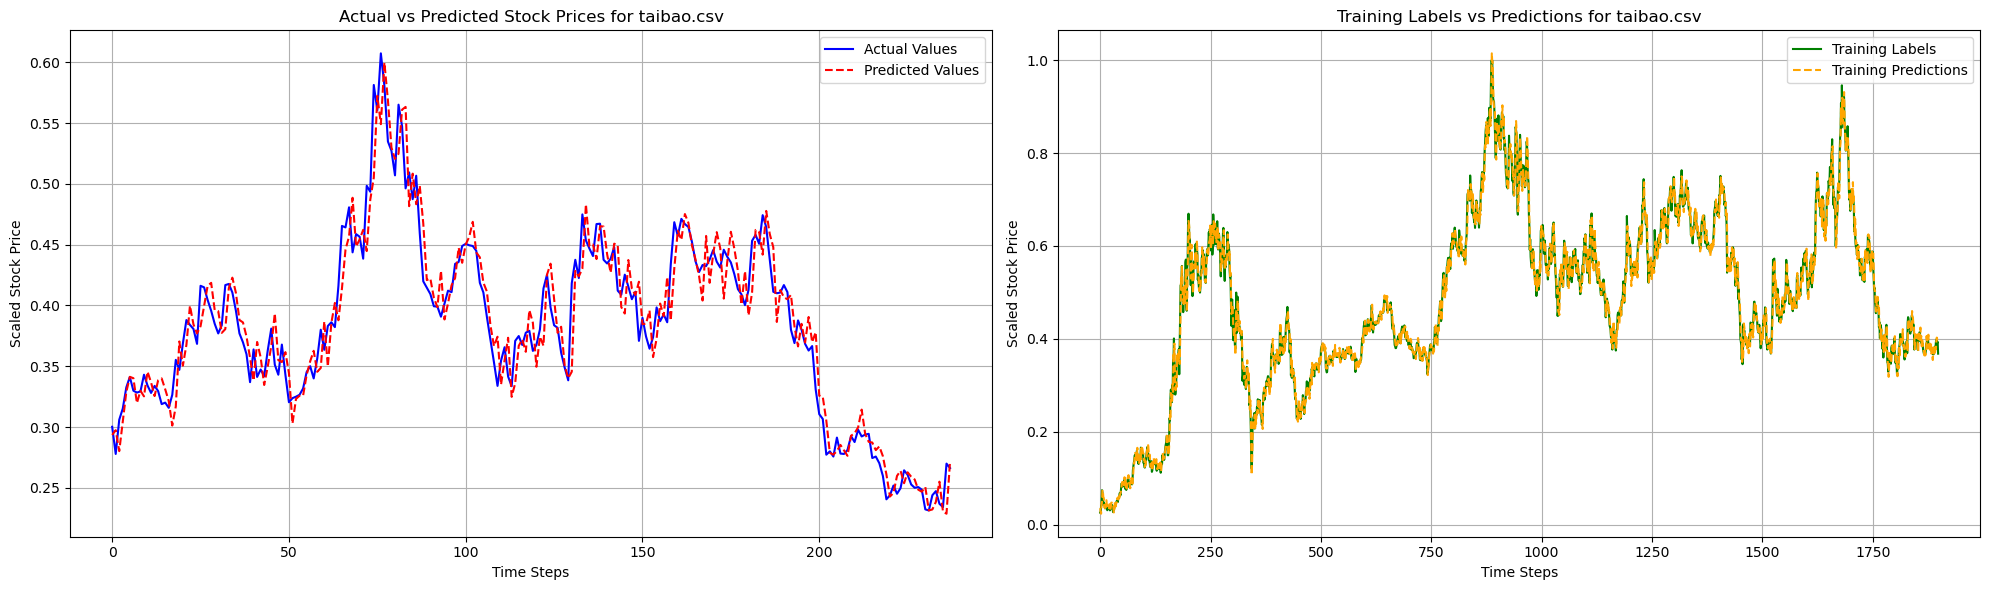

2024-11-28 22:04:56,399 - INFO - Model saved to shenhua.csv_linear_regression_model.pkl


Processing file: shenhua.csv
File: shenhua.csv
Linear Regression模型的MSE是: 0.000395
Linear Regression模型的RMSE是: 0.019867
Linear Regression模型的MAE是: 0.014972
Linear Regression模型的MAPE是: 0.020308
Linear Regression模型的R^2是: 0.893469
--------------------------------------------------


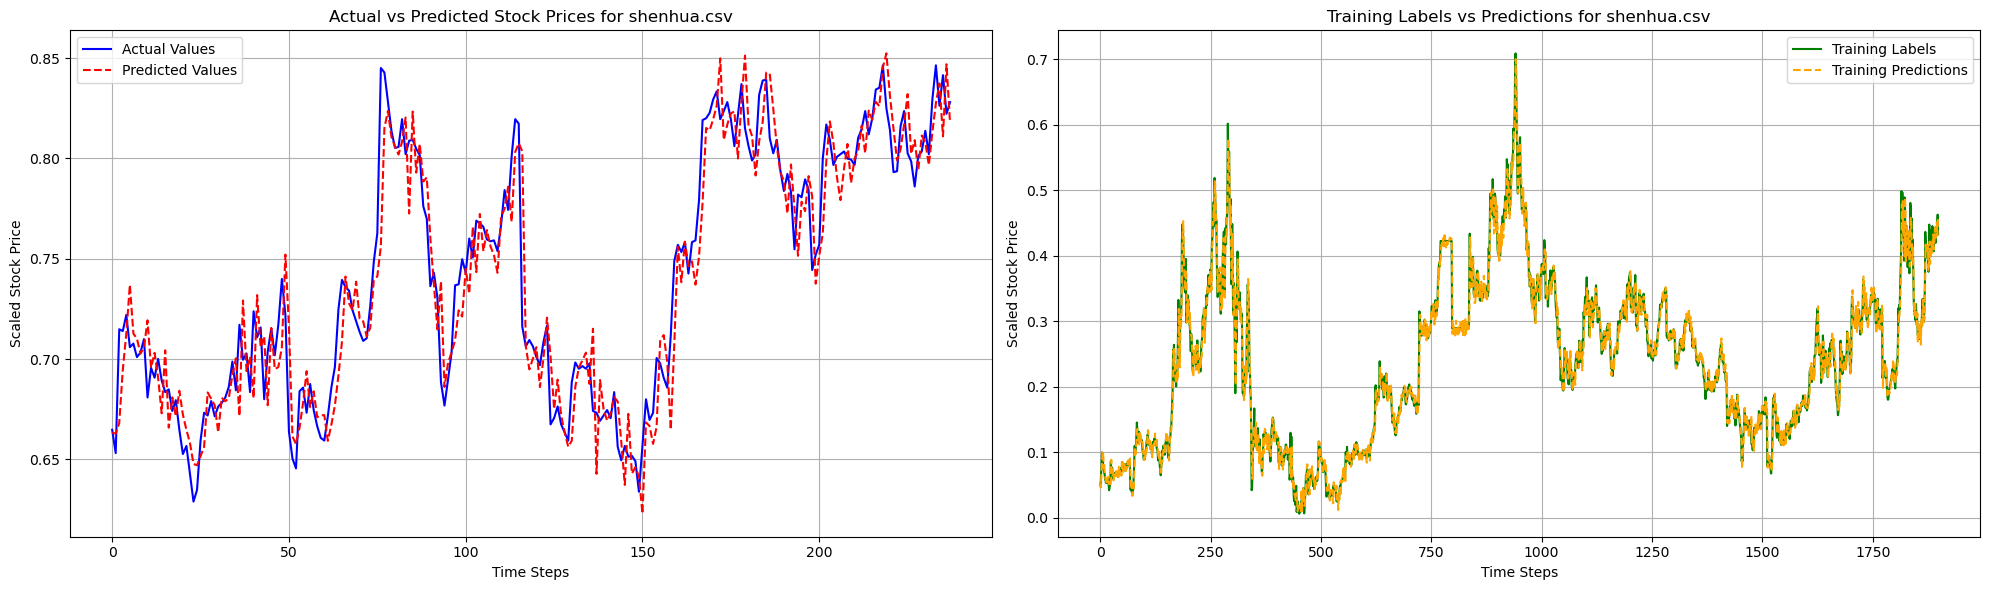

2024-11-28 22:04:56,705 - INFO - Model saved to haier.csv_linear_regression_model.pkl


Processing file: haier.csv
File: haier.csv
Linear Regression模型的MSE是: 0.000280
Linear Regression模型的RMSE是: 0.016726
Linear Regression模型的MAE是: 0.012746
Linear Regression模型的MAPE是: 0.022255
Linear Regression模型的R^2是: 0.912786
--------------------------------------------------


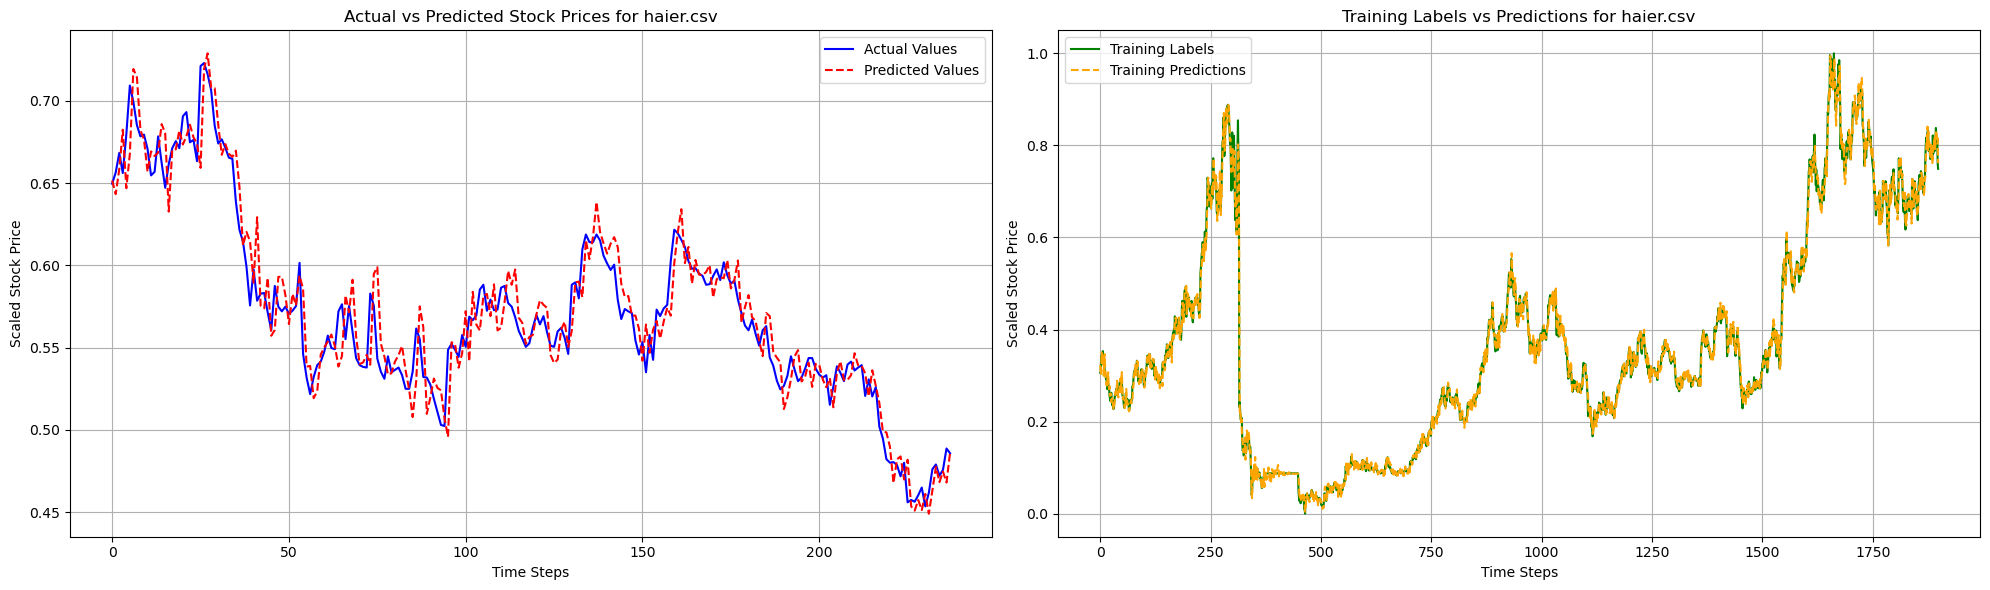

2024-11-28 22:04:57,075 - INFO - Model saved to zhongguochuanbo.csv_linear_regression_model.pkl


Processing file: zhongguochuanbo.csv
File: zhongguochuanbo.csv
Linear Regression模型的MSE是: 0.000254
Linear Regression模型的RMSE是: 0.015938
Linear Regression模型的MAE是: 0.012379
Linear Regression模型的MAPE是: 0.040509
Linear Regression模型的R^2是: 0.875346
--------------------------------------------------


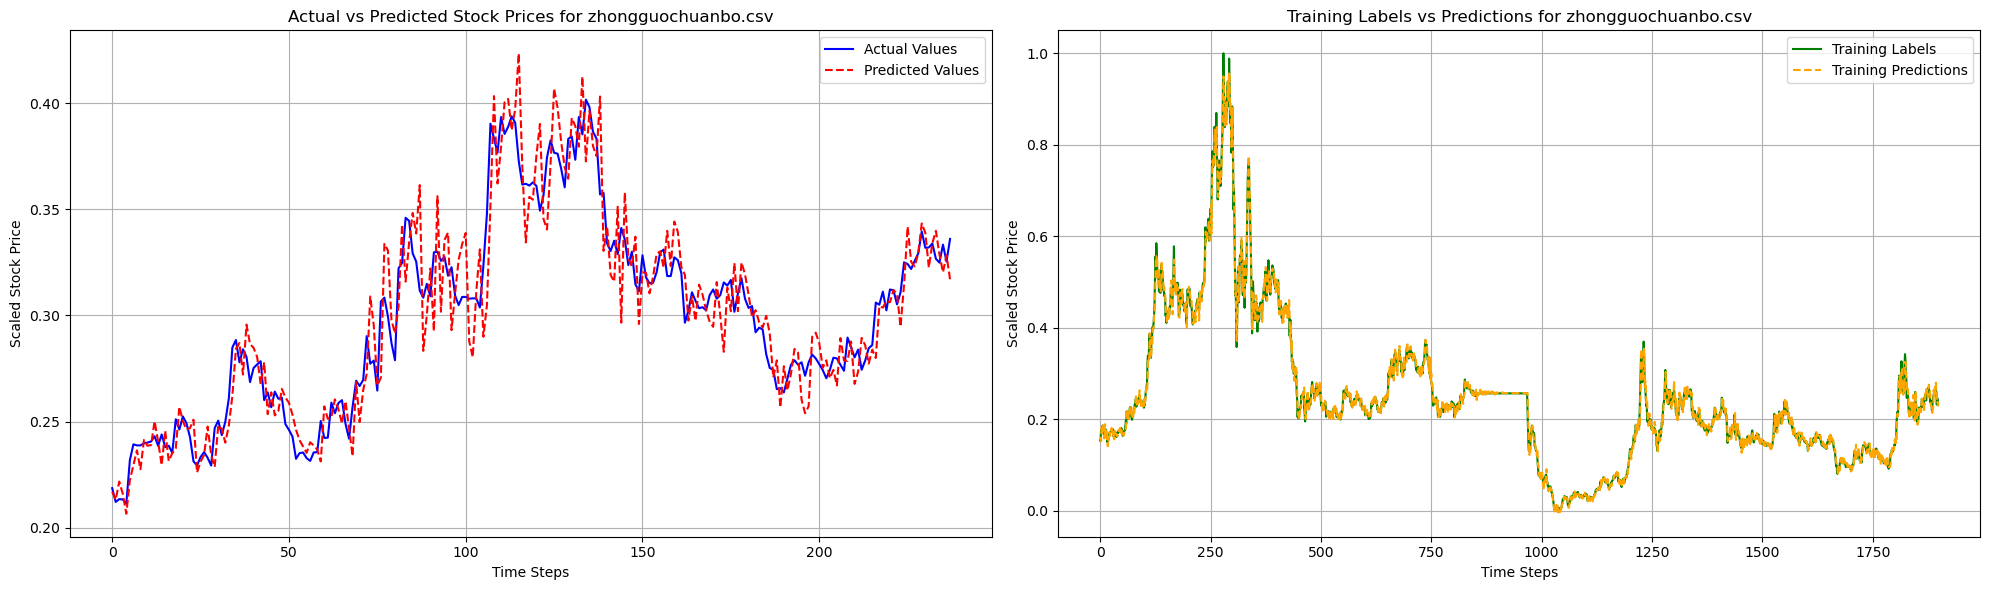

2024-11-28 22:04:57,399 - INFO - Model saved to longji.csv_linear_regression_model.pkl


Processing file: longji.csv
File: longji.csv
Linear Regression模型的MSE是: 0.000142
Linear Regression模型的RMSE是: 0.011897
Linear Regression模型的MAE是: 0.009311
Linear Regression模型的MAPE是: 0.051367
Linear Regression模型的R^2是: 0.970773
--------------------------------------------------


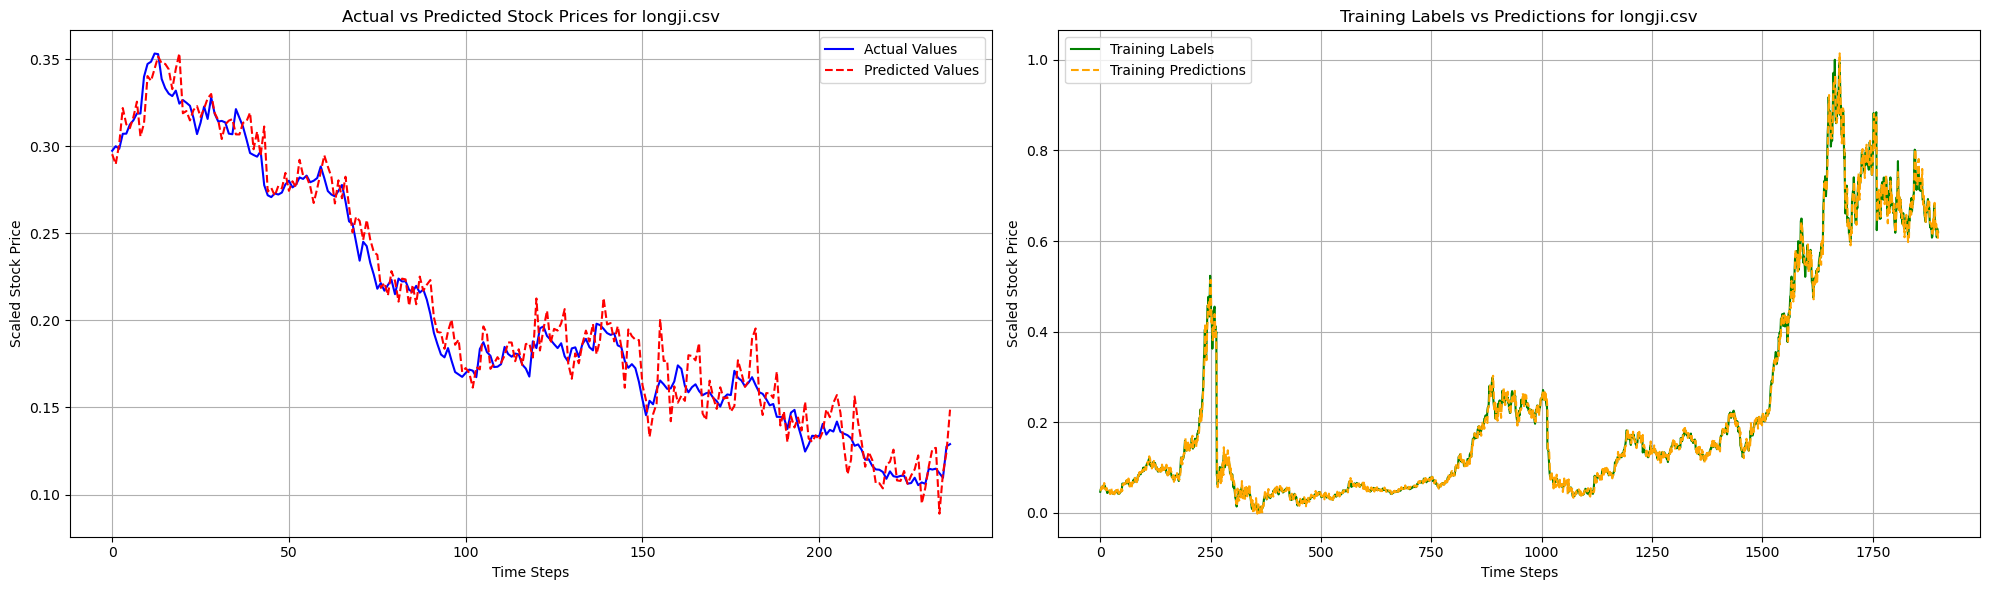

2024-11-28 22:04:57,700 - INFO - Model saved to changjiangdianli.csv_linear_regression_model.pkl


Processing file: changjiangdianli.csv
File: changjiangdianli.csv
Linear Regression模型的MSE是: 0.000124
Linear Regression模型的RMSE是: 0.011127
Linear Regression模型的MAE是: 0.008424
Linear Regression模型的MAPE是: 0.010035
Linear Regression模型的R^2是: 0.915771
--------------------------------------------------


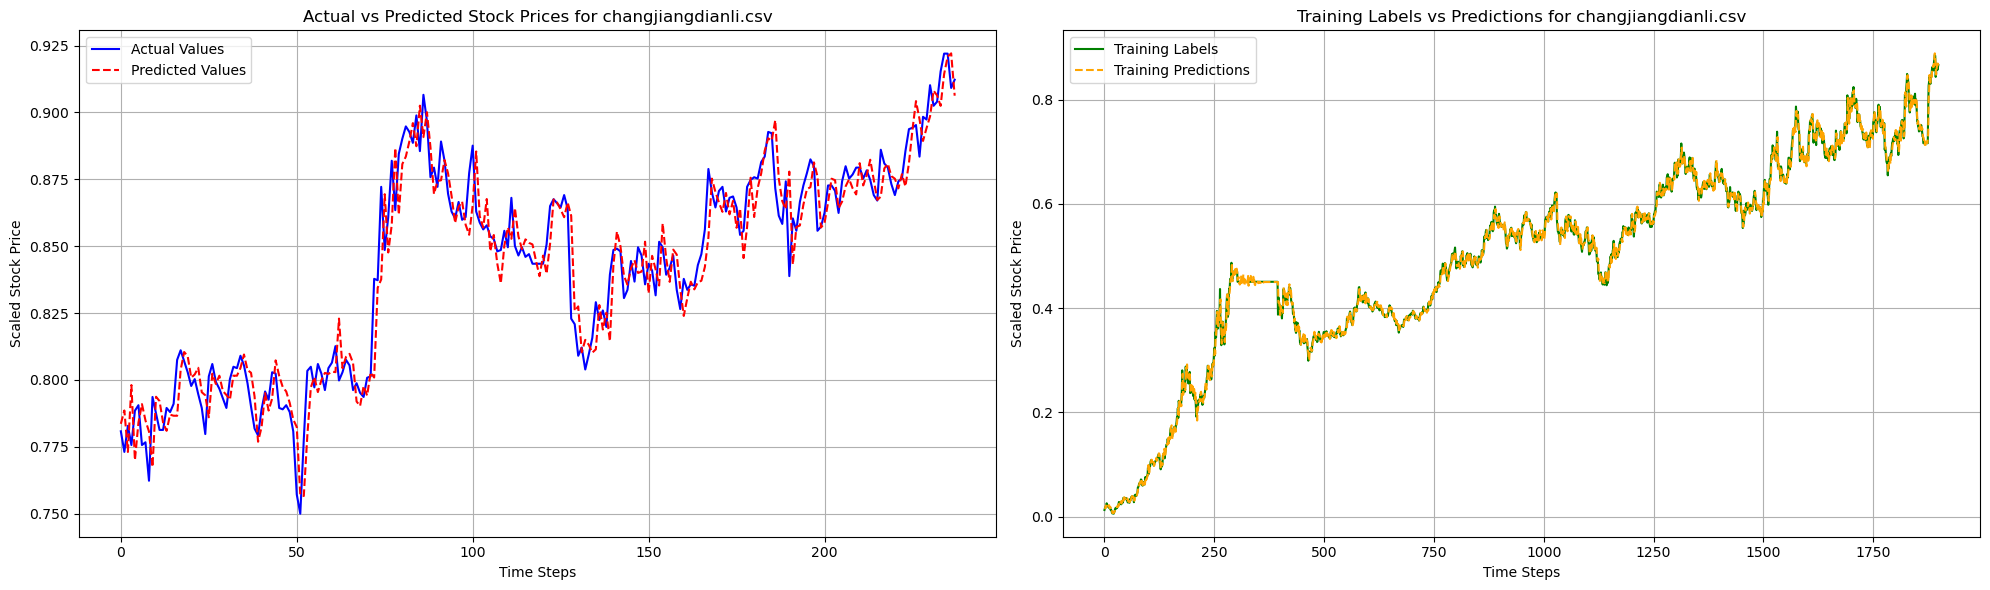

2024-11-28 22:04:58,071 - INFO - Model saved to xingyebank.csv_linear_regression_model.pkl


Processing file: xingyebank.csv
File: xingyebank.csv
Linear Regression模型的MSE是: 0.000126
Linear Regression模型的RMSE是: 0.011223
Linear Regression模型的MAE是: 0.007630
Linear Regression模型的MAPE是: 0.019362
Linear Regression模型的R^2是: 0.949783
--------------------------------------------------


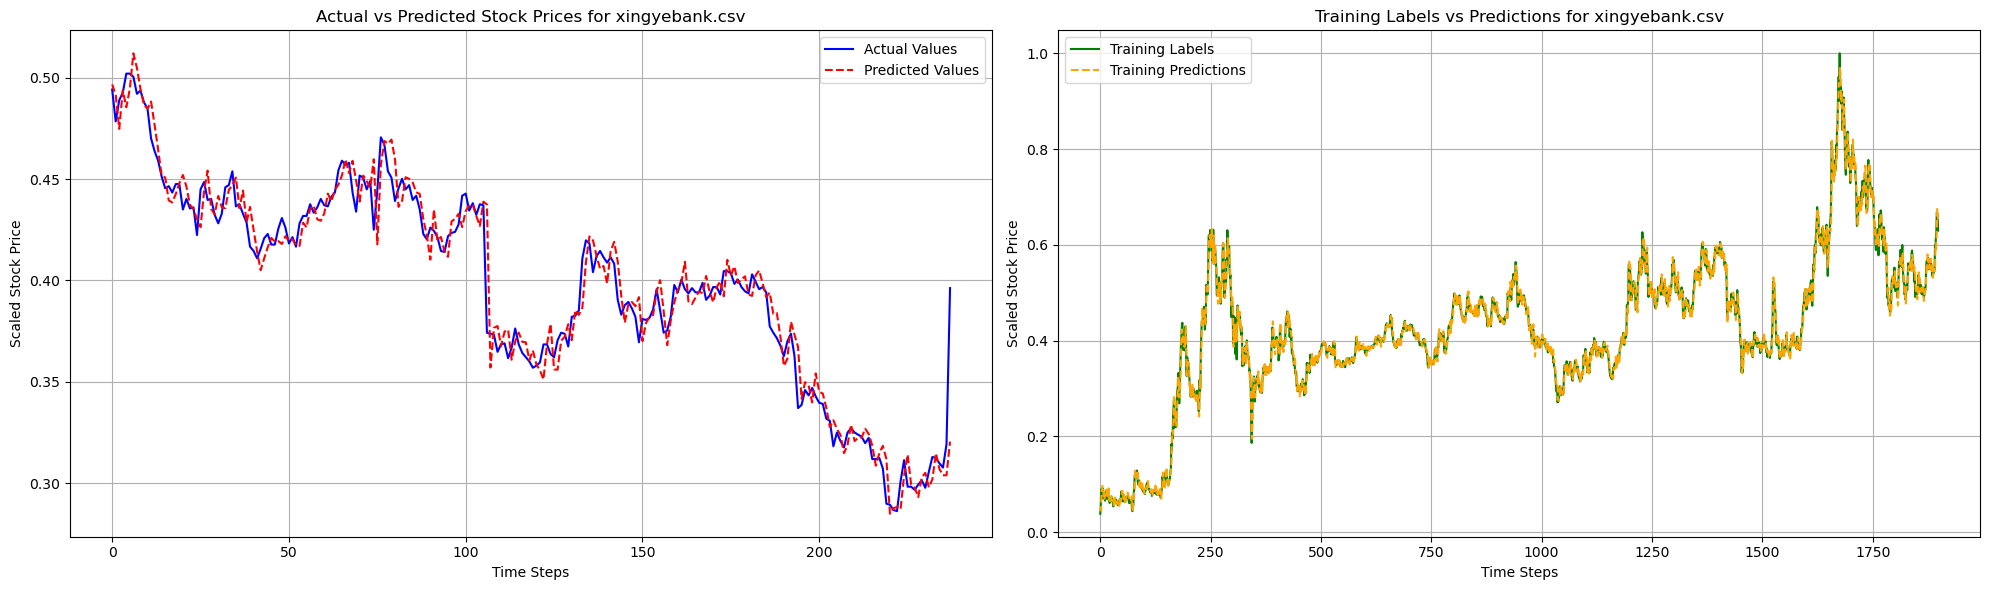

Processing file: zhongguojianzhu.csv


2024-11-28 22:04:58,657 - INFO - Model saved to zhongguojianzhu.csv_linear_regression_model.pkl


File: zhongguojianzhu.csv
Linear Regression模型的MSE是: 0.000146
Linear Regression模型的RMSE是: 0.012090
Linear Regression模型的MAE是: 0.009274
Linear Regression模型的MAPE是: 0.028587
Linear Regression模型的R^2是: 0.947897
--------------------------------------------------


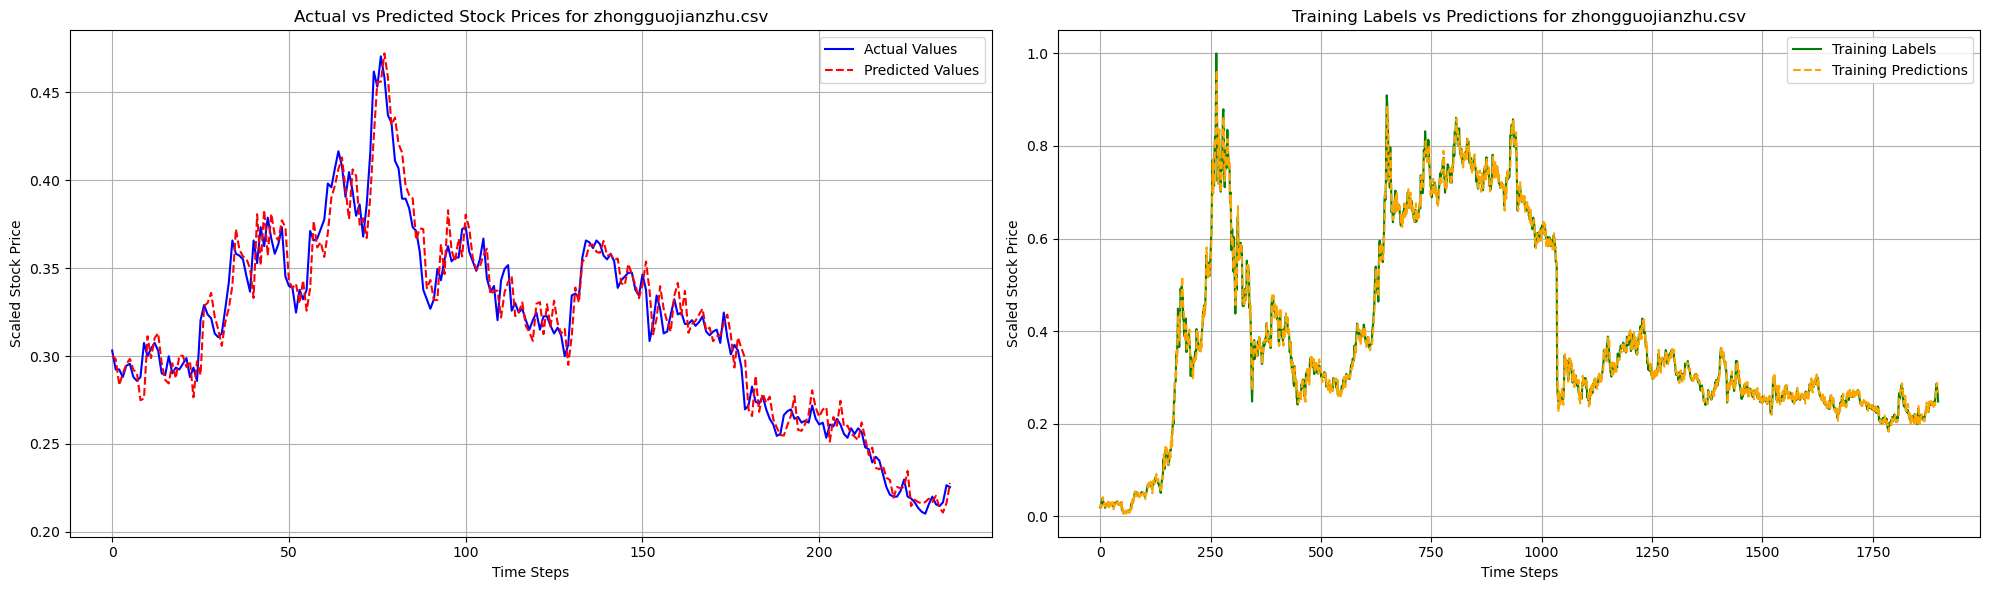

2024-11-28 22:04:58,974 - INFO - Model saved to haitian.csv_linear_regression_model.pkl


Processing file: haitian.csv
File: haitian.csv
Linear Regression模型的MSE是: 0.000070
Linear Regression模型的RMSE是: 0.008361
Linear Regression模型的MAE是: 0.006200
Linear Regression模型的MAPE是: 0.027807
Linear Regression模型的R^2是: 0.989094
--------------------------------------------------


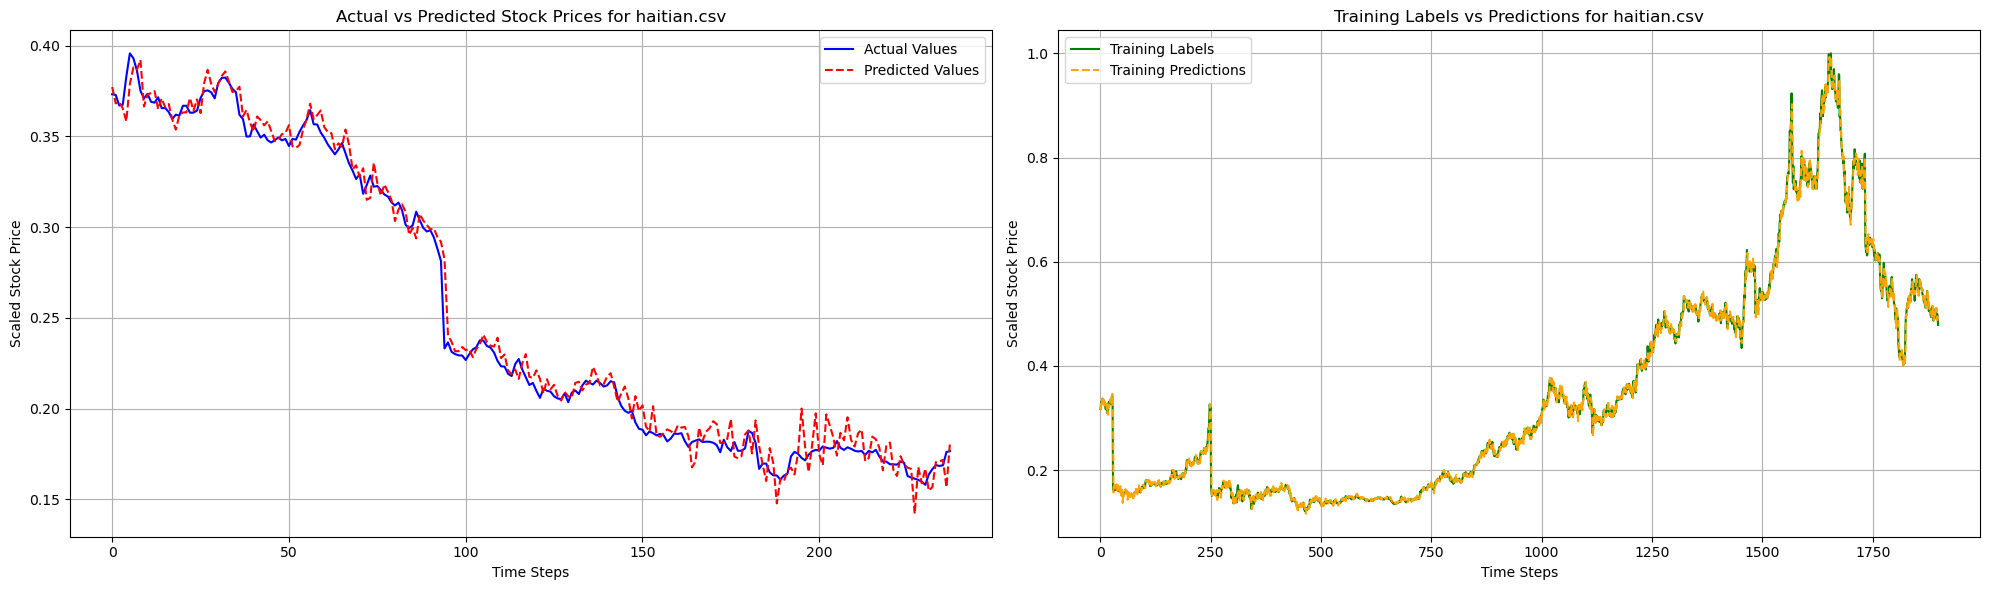

2024-11-28 22:04:59,355 - INFO - Model saved to baoli.csv_linear_regression_model.pkl


Processing file: baoli.csv
File: baoli.csv
Linear Regression模型的MSE是: 0.000338
Linear Regression模型的RMSE是: 0.018398
Linear Regression模型的MAE是: 0.013889
Linear Regression模型的MAPE是: 0.025052
Linear Regression模型的R^2是: 0.975272
--------------------------------------------------


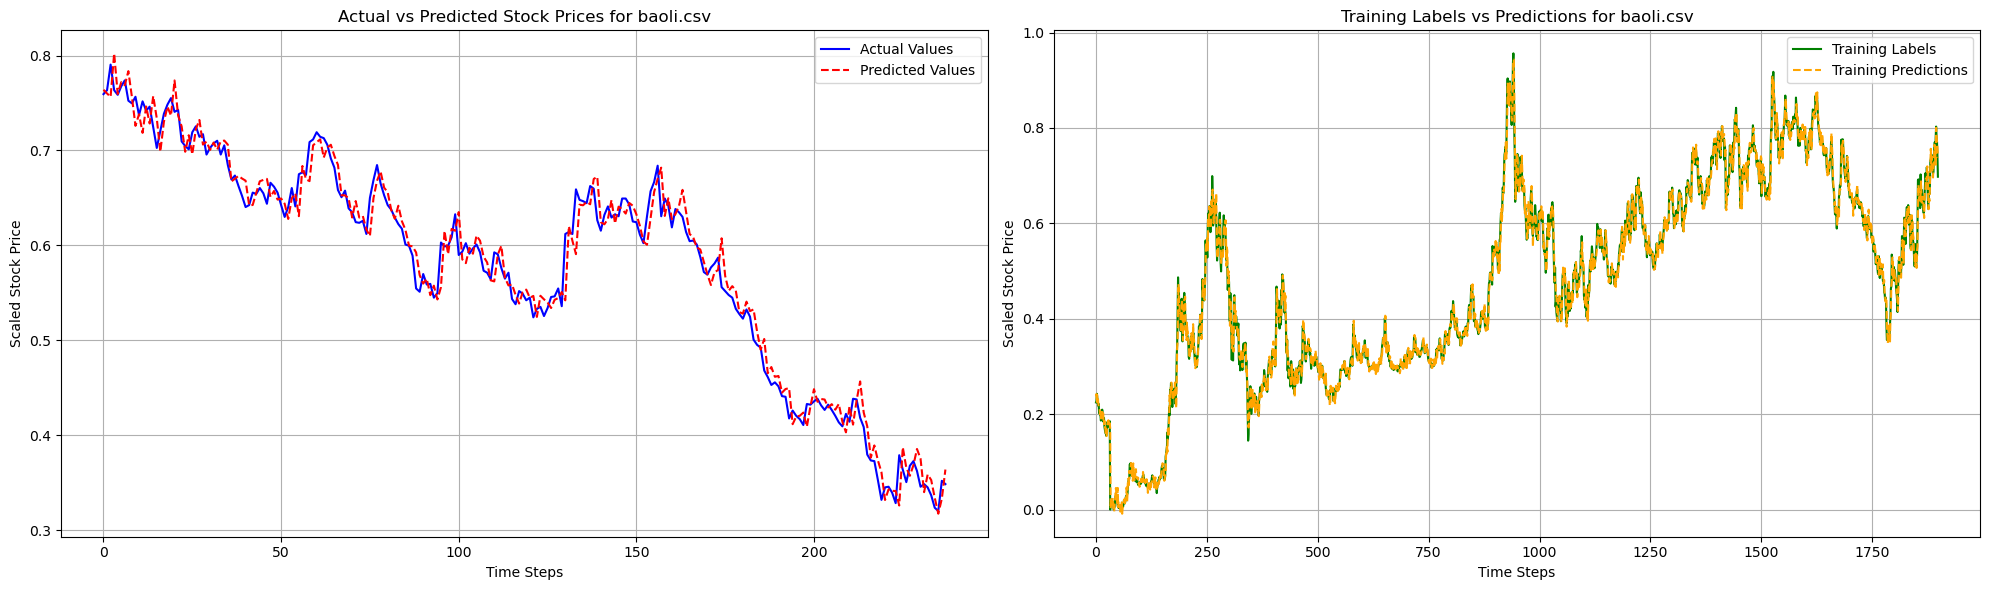

2024-11-28 22:04:59,637 - WARNING - File weier.csv has too many missing values (average missing rate: 45.64%). Skipping file.
2024-11-28 22:04:59,651 - WARNING - File haiguang.csv has too many missing values (average missing rate: 88.46%). Skipping file.


Processing file: weier.csv
Processing file: haiguang.csv
Processing file: shangqi.csv


2024-11-28 22:04:59,908 - INFO - Model saved to shangqi.csv_linear_regression_model.pkl


File: shangqi.csv
Linear Regression模型的MSE是: 0.000065
Linear Regression模型的RMSE是: 0.008055
Linear Regression模型的MAE是: 0.006268
Linear Regression模型的MAPE是: 0.081215
Linear Regression模型的R^2是: 0.853992
--------------------------------------------------


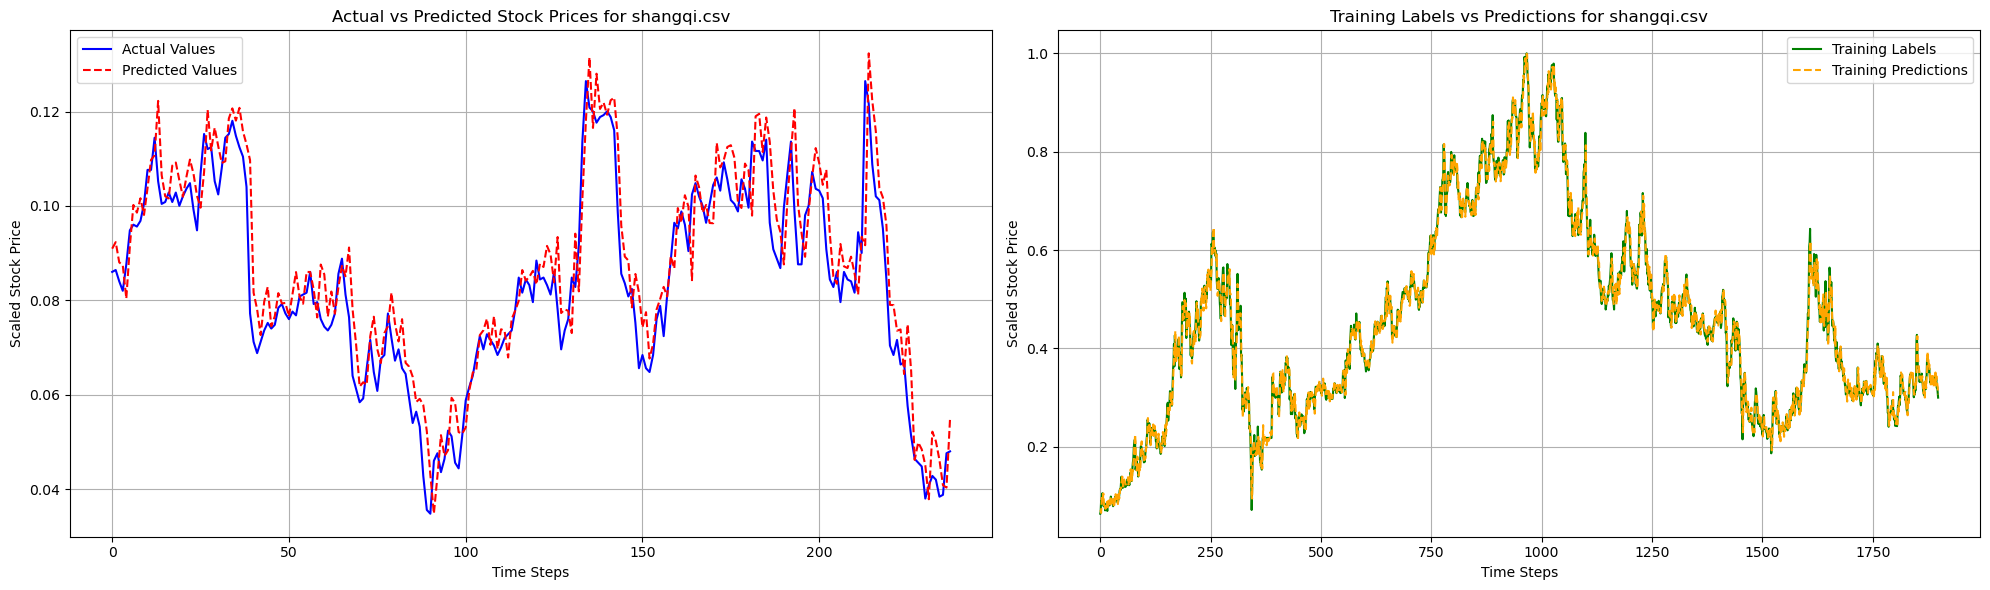

2024-11-28 22:05:00,229 - INFO - Model saved to renshou.csv_linear_regression_model.pkl


Processing file: renshou.csv
File: renshou.csv
Linear Regression模型的MSE是: 0.000411
Linear Regression模型的RMSE是: 0.020278
Linear Regression模型的MAE是: 0.015896
Linear Regression模型的MAPE是: 0.028108
Linear Regression模型的R^2是: 0.930944
--------------------------------------------------


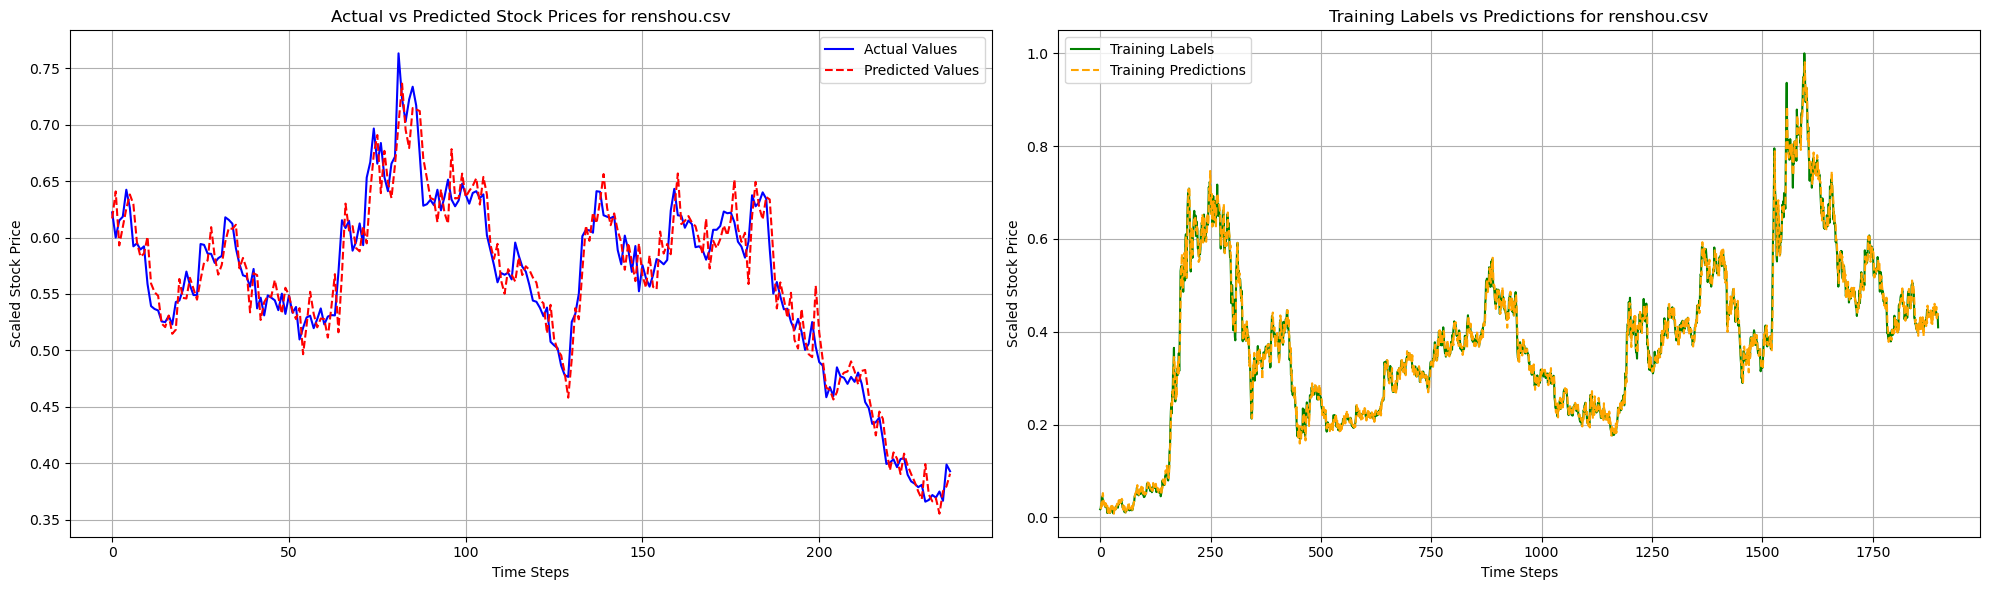

2024-11-28 22:05:00,538 - INFO - Model saved to pingan.csv_linear_regression_model.pkl


Processing file: pingan.csv
File: pingan.csv
Linear Regression模型的MSE是: 0.000198
Linear Regression模型的RMSE是: 0.014089
Linear Regression模型的MAE是: 0.010903
Linear Regression模型的MAPE是: 0.033550
Linear Regression模型的R^2是: 0.926680
--------------------------------------------------


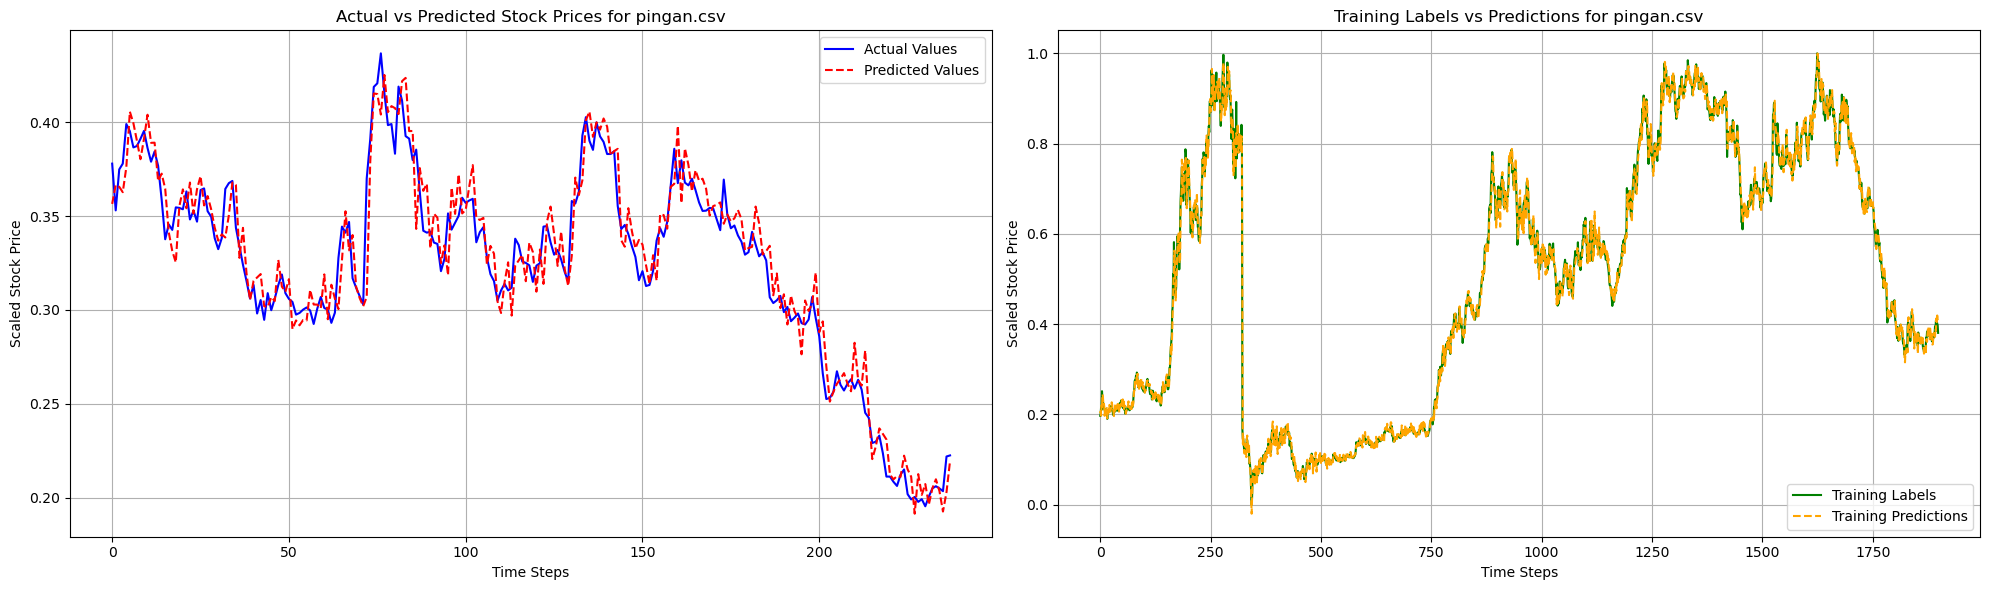

2024-11-28 22:05:00,795 - INFO - Model saved to zijin.csv_linear_regression_model.pkl


Processing file: zijin.csv
File: zijin.csv
Linear Regression模型的MSE是: 0.000568
Linear Regression模型的RMSE是: 0.023833
Linear Regression模型的MAE是: 0.018642
Linear Regression模型的MAPE是: 0.023449
Linear Regression模型的R^2是: 0.789726
--------------------------------------------------


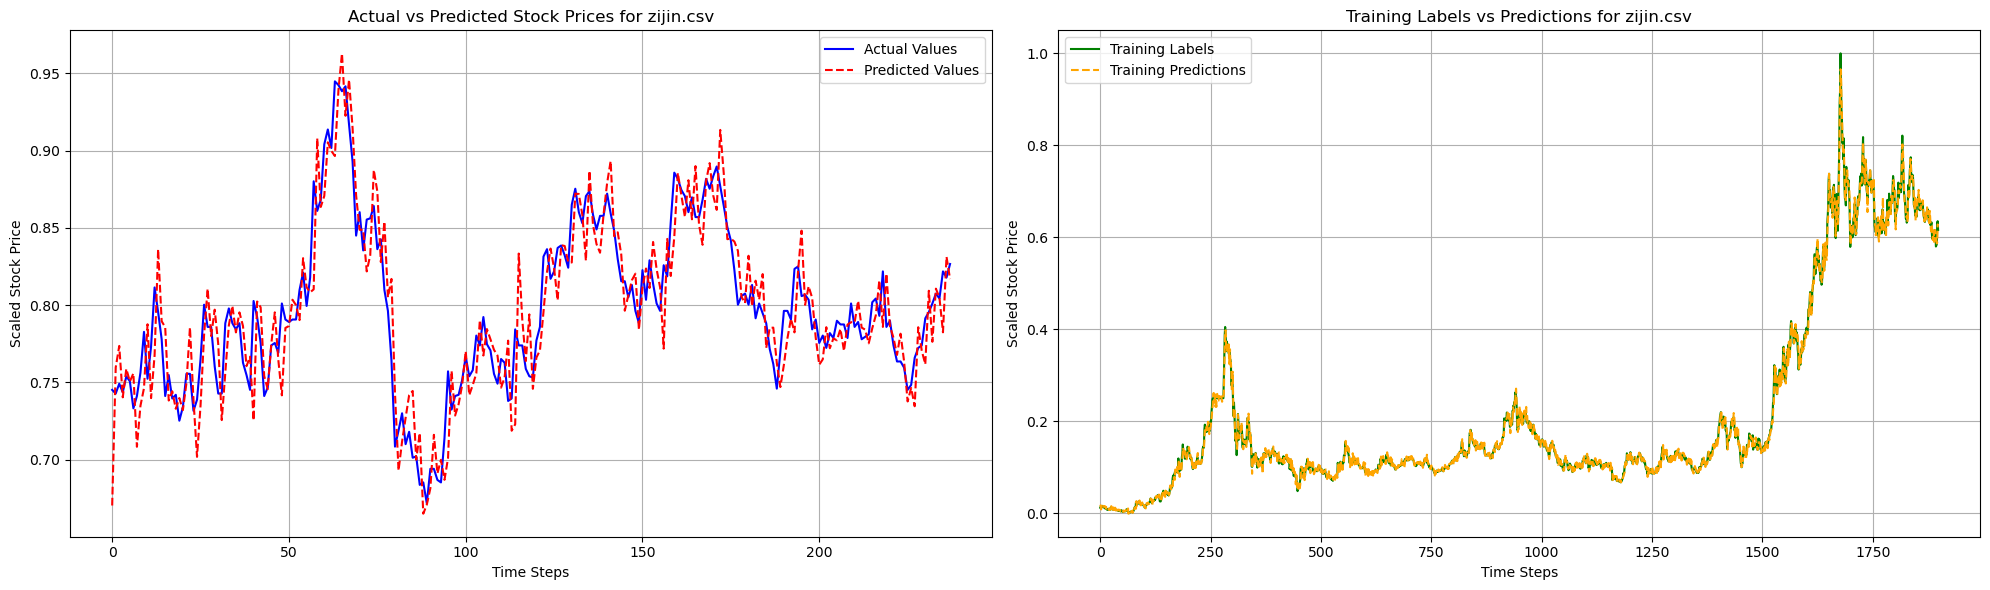

2024-11-28 22:05:01,184 - INFO - Model saved to pianzai.csv_linear_regression_model.pkl


Processing file: pianzai.csv
File: pianzai.csv
Linear Regression模型的MSE是: 0.000163
Linear Regression模型的RMSE是: 0.012748
Linear Regression模型的MAE是: 0.009746
Linear Regression模型的MAPE是: 0.018166
Linear Regression模型的R^2是: 0.934142
--------------------------------------------------


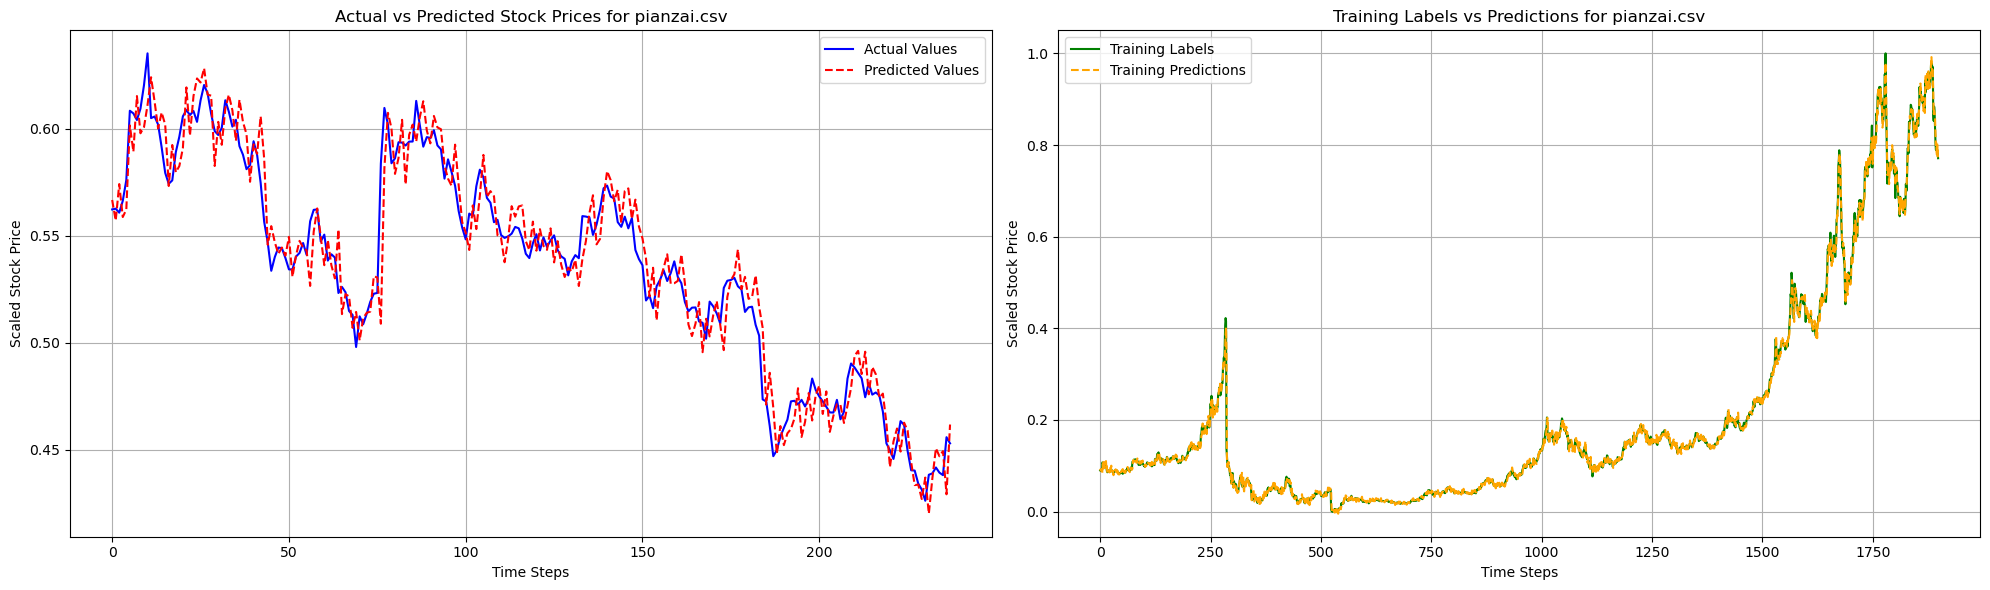

2024-11-28 22:05:01,451 - INFO - Model saved to zhongxinzhengquan.csv_linear_regression_model.pkl


Processing file: zhongxinzhengquan.csv
File: zhongxinzhengquan.csv
Linear Regression模型的MSE是: 0.000211
Linear Regression模型的RMSE是: 0.014522
Linear Regression模型的MAE是: 0.010881
Linear Regression模型的MAPE是: 0.026204
Linear Regression模型的R^2是: 0.883727
--------------------------------------------------


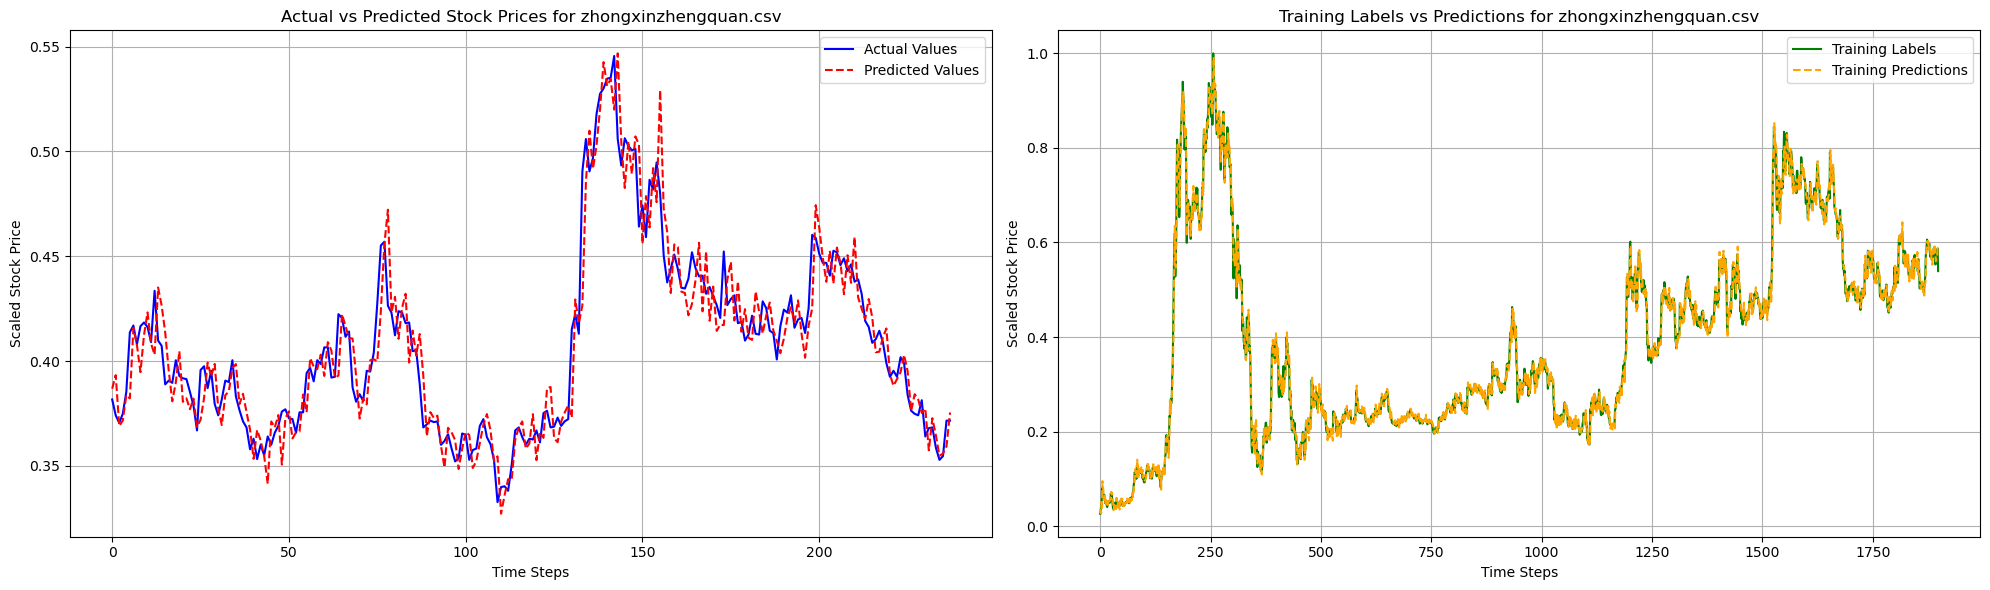

2024-11-28 22:05:01,794 - INFO - Model saved to wanhua.csv_linear_regression_model.pkl


Processing file: wanhua.csv
File: wanhua.csv
Linear Regression模型的MSE是: 0.000176
Linear Regression模型的RMSE是: 0.013273
Linear Regression模型的MAE是: 0.010198
Linear Regression模型的MAPE是: 0.017193
Linear Regression模型的R^2是: 0.938238
--------------------------------------------------


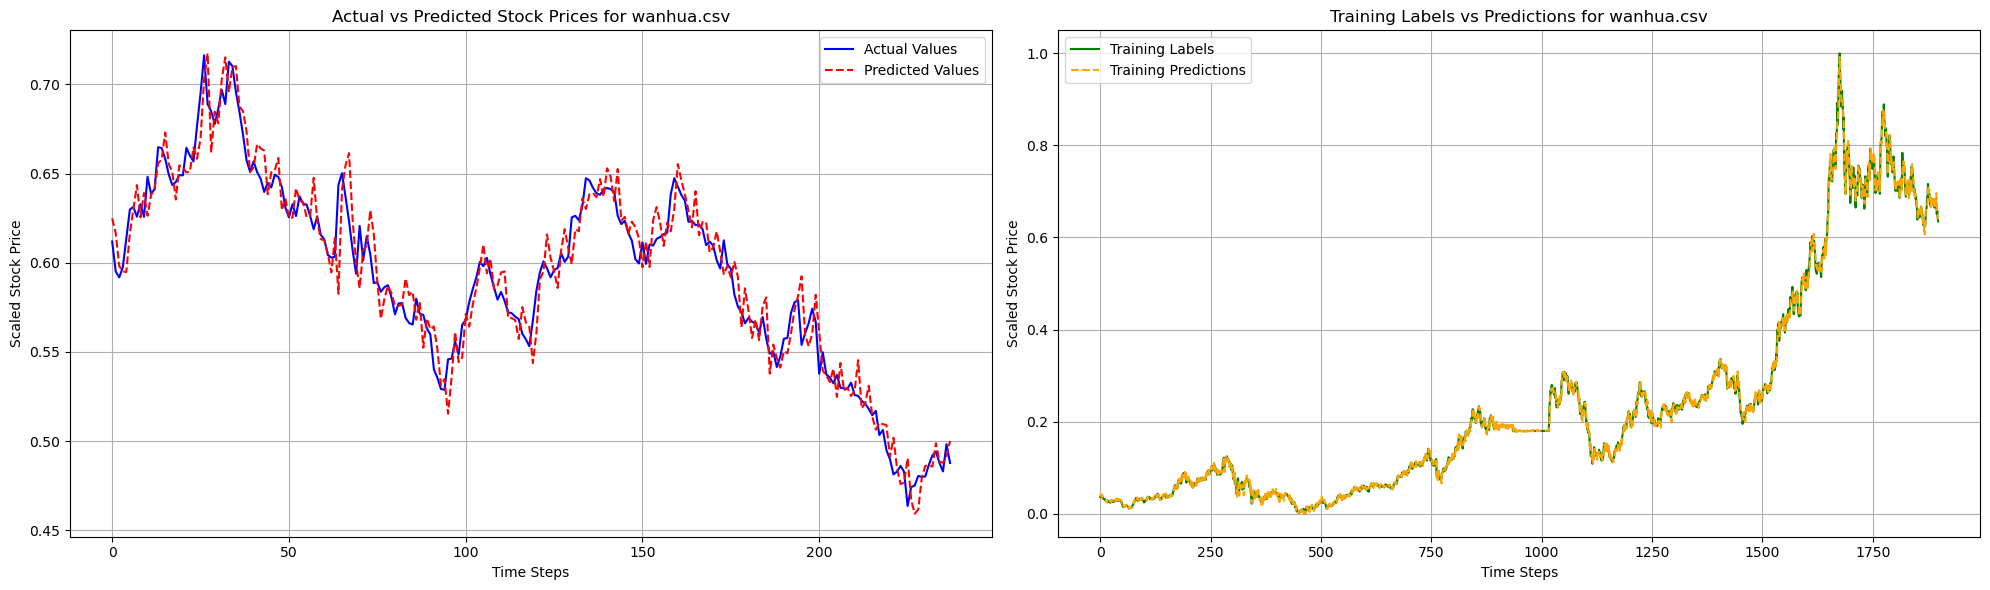

2024-11-28 22:05:02,078 - INFO - Model saved to zhongtie.csv_linear_regression_model.pkl


Processing file: zhongtie.csv
File: zhongtie.csv
Linear Regression模型的MSE是: 0.000131
Linear Regression模型的RMSE是: 0.011449
Linear Regression模型的MAE是: 0.008371
Linear Regression模型的MAPE是: 0.036009
Linear Regression模型的R^2是: 0.945090
--------------------------------------------------


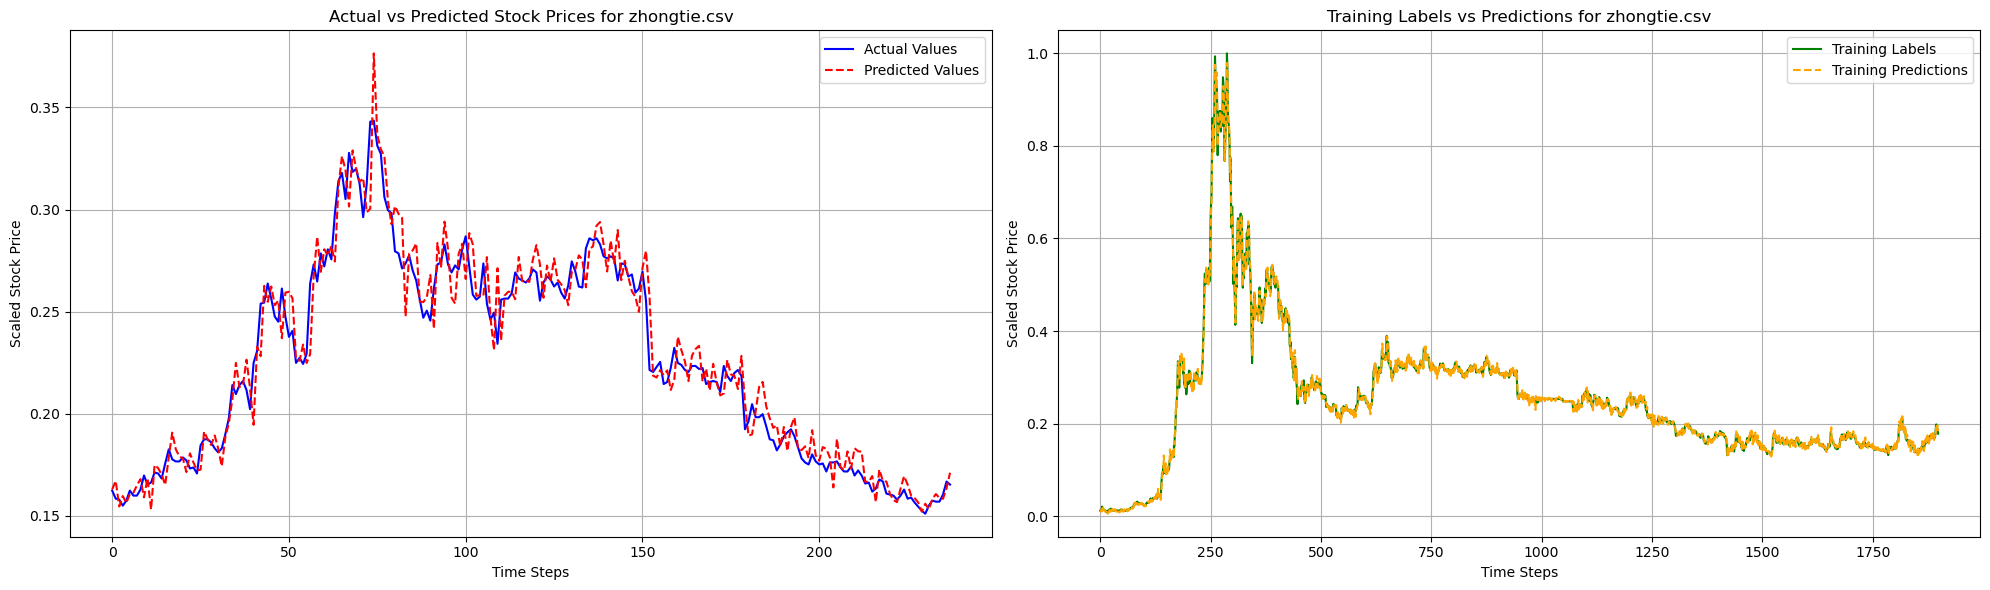

2024-11-28 22:05:02,550 - INFO - Model saved to maotai.csv_linear_regression_model.pkl


Processing file: maotai.csv
File: maotai.csv
Linear Regression模型的MSE是: 0.000135
Linear Regression模型的RMSE是: 0.011621
Linear Regression模型的MAE是: 0.009021
Linear Regression模型的MAPE是: 0.013617
Linear Regression模型的R^2是: 0.811771
--------------------------------------------------


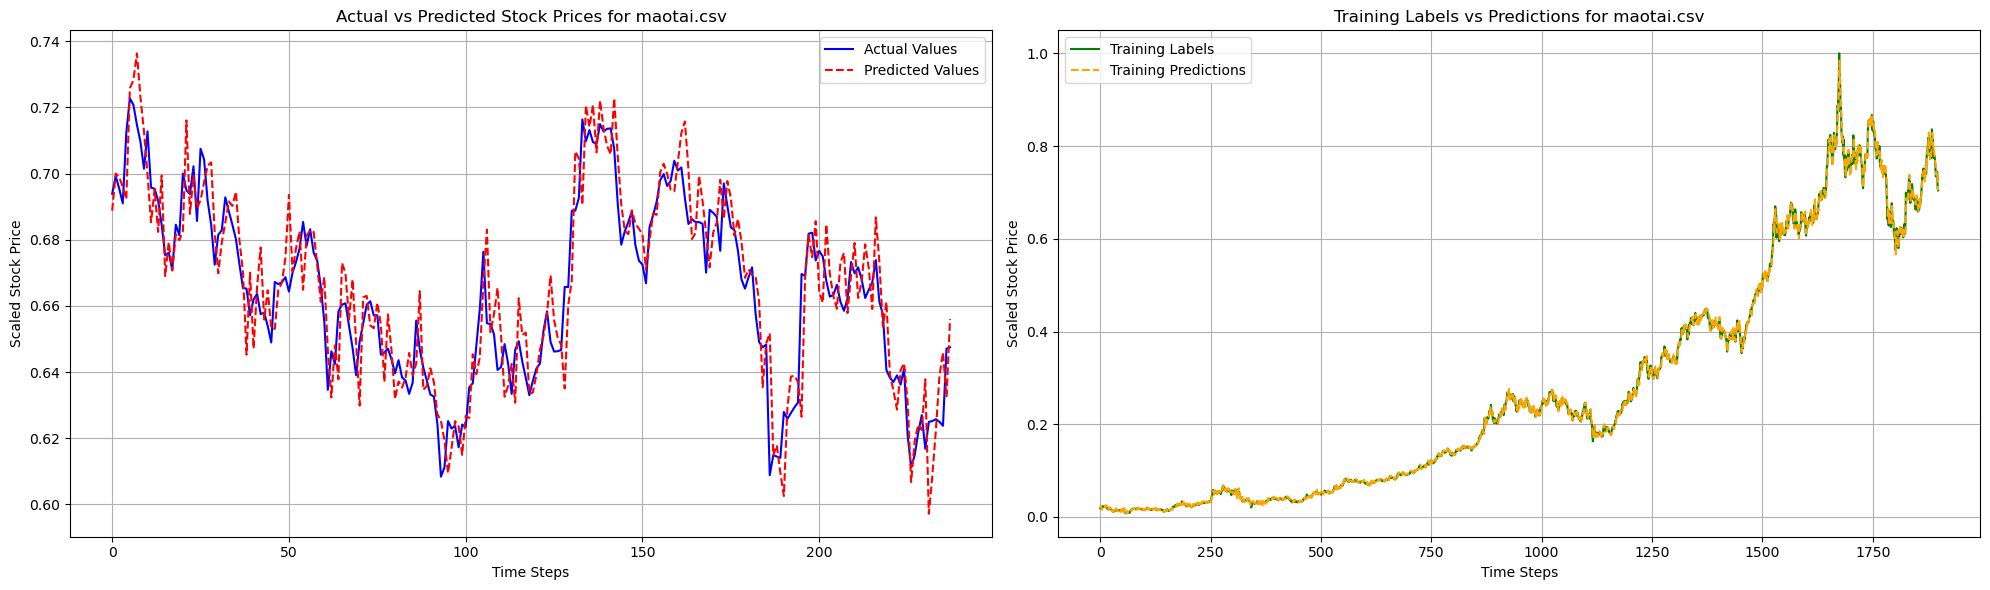

2024-11-28 22:05:02,768 - WARNING - File yaoming.csv has too many missing values (average missing rate: 52.89%). Skipping file.
2024-11-28 22:05:02,861 - INFO - Model saved to tebian.csv_linear_regression_model.pkl


Processing file: yaoming.csv
Processing file: tebian.csv
File: tebian.csv
Linear Regression模型的MSE是: 0.000583
Linear Regression模型的RMSE是: 0.024151
Linear Regression模型的MAE是: 0.014900
Linear Regression模型的MAPE是: 0.031651
Linear Regression模型的R^2是: 0.974950
--------------------------------------------------


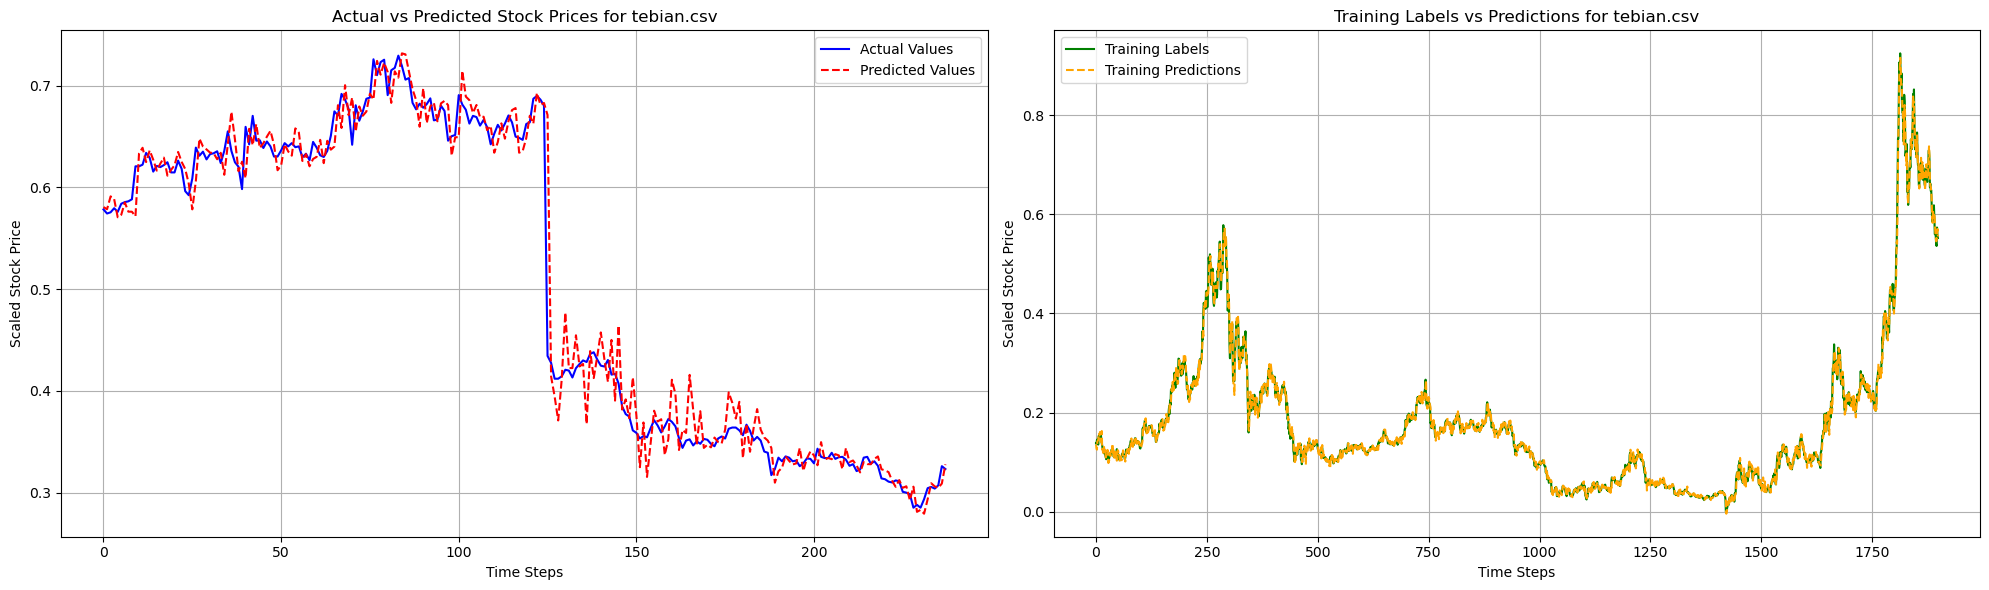

2024-11-28 22:05:03,133 - WARNING - File dianxin.csv has too many missing values (average missing rate: 80.38%). Skipping file.
2024-11-28 22:05:03,158 - WARNING - File jinshanbangong.csv has too many missing values (average missing rate: 65.69%). Skipping file.
2024-11-28 22:05:03,166 - WARNING - File zhongxinguoji.csv has too many missing values (average missing rate: 71.17%). Skipping file.


Processing file: dianxin.csv
Processing file: jinshanbangong.csv
Processing file: zhongxinguoji.csv
Processing file: liantong.csv


2024-11-28 22:05:03,322 - INFO - Model saved to liantong.csv_linear_regression_model.pkl


File: liantong.csv
Linear Regression模型的MSE是: 0.000516
Linear Regression模型的RMSE是: 0.022709
Linear Regression模型的MAE是: 0.016801
Linear Regression模型的MAPE是: 0.059382
Linear Regression模型的R^2是: 0.850918
--------------------------------------------------


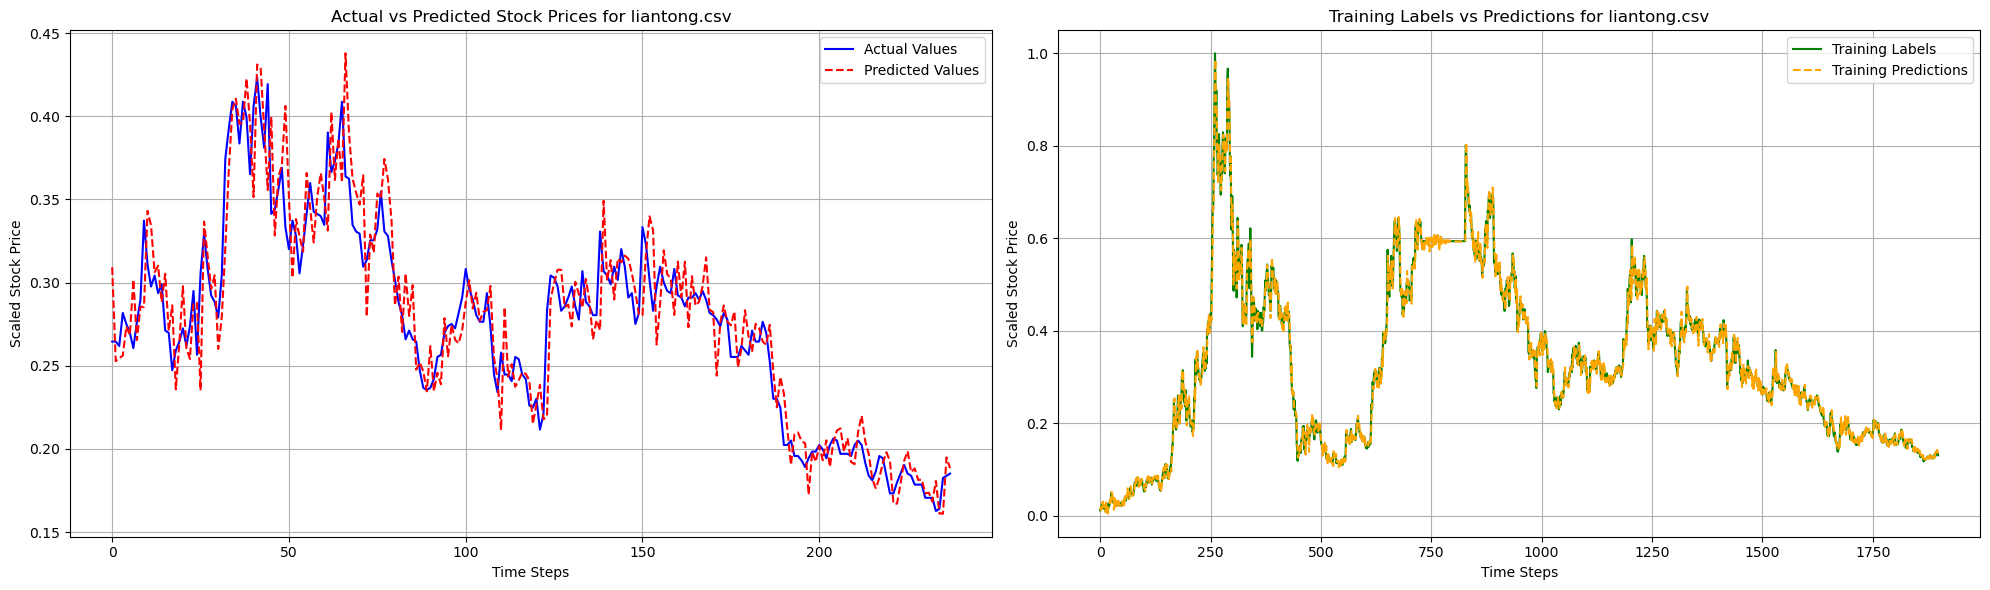

2024-11-28 22:05:03,596 - WARNING - File sanxia.csv has too many missing values (average missing rate: 78.67%). Skipping file.
2024-11-28 22:05:03,673 - INFO - Model saved to guodiannanrui.csv_linear_regression_model.pkl


Processing file: sanxia.csv
Processing file: guodiannanrui.csv
File: guodiannanrui.csv
Linear Regression模型的MSE是: 0.000281
Linear Regression模型的RMSE是: 0.016764
Linear Regression模型的MAE是: 0.011336
Linear Regression模型的MAPE是: 0.032085
Linear Regression模型的R^2是: 0.932458
--------------------------------------------------


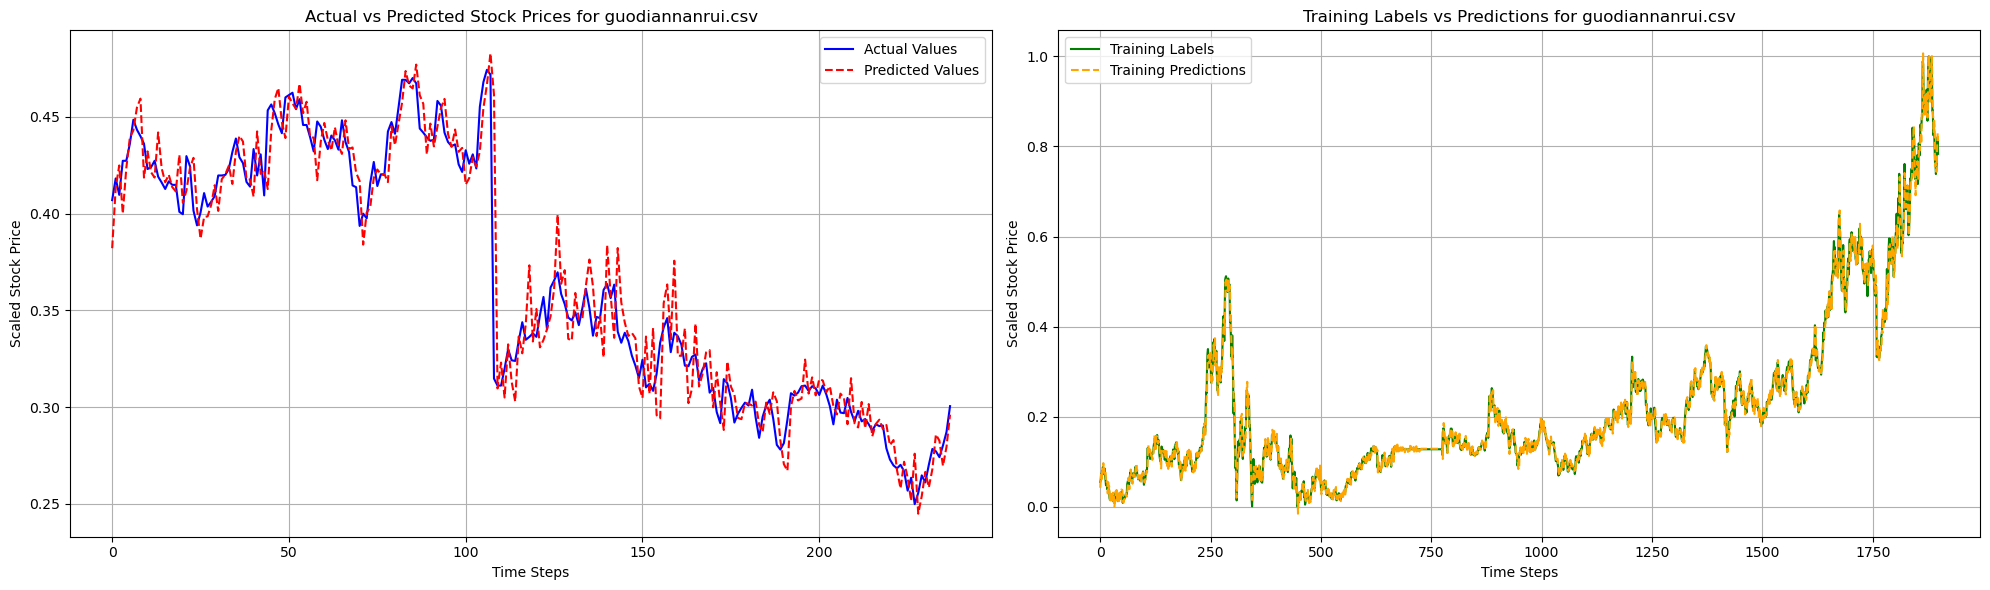

2024-11-28 22:05:03,952 - INFO - Model saved to changcheng.csv_linear_regression_model.pkl


Processing file: changcheng.csv
File: changcheng.csv
Linear Regression模型的MSE是: 0.000161
Linear Regression模型的RMSE是: 0.012691
Linear Regression模型的MAE是: 0.010003
Linear Regression模型的MAPE是: 0.028266
Linear Regression模型的R^2是: 0.913741
--------------------------------------------------


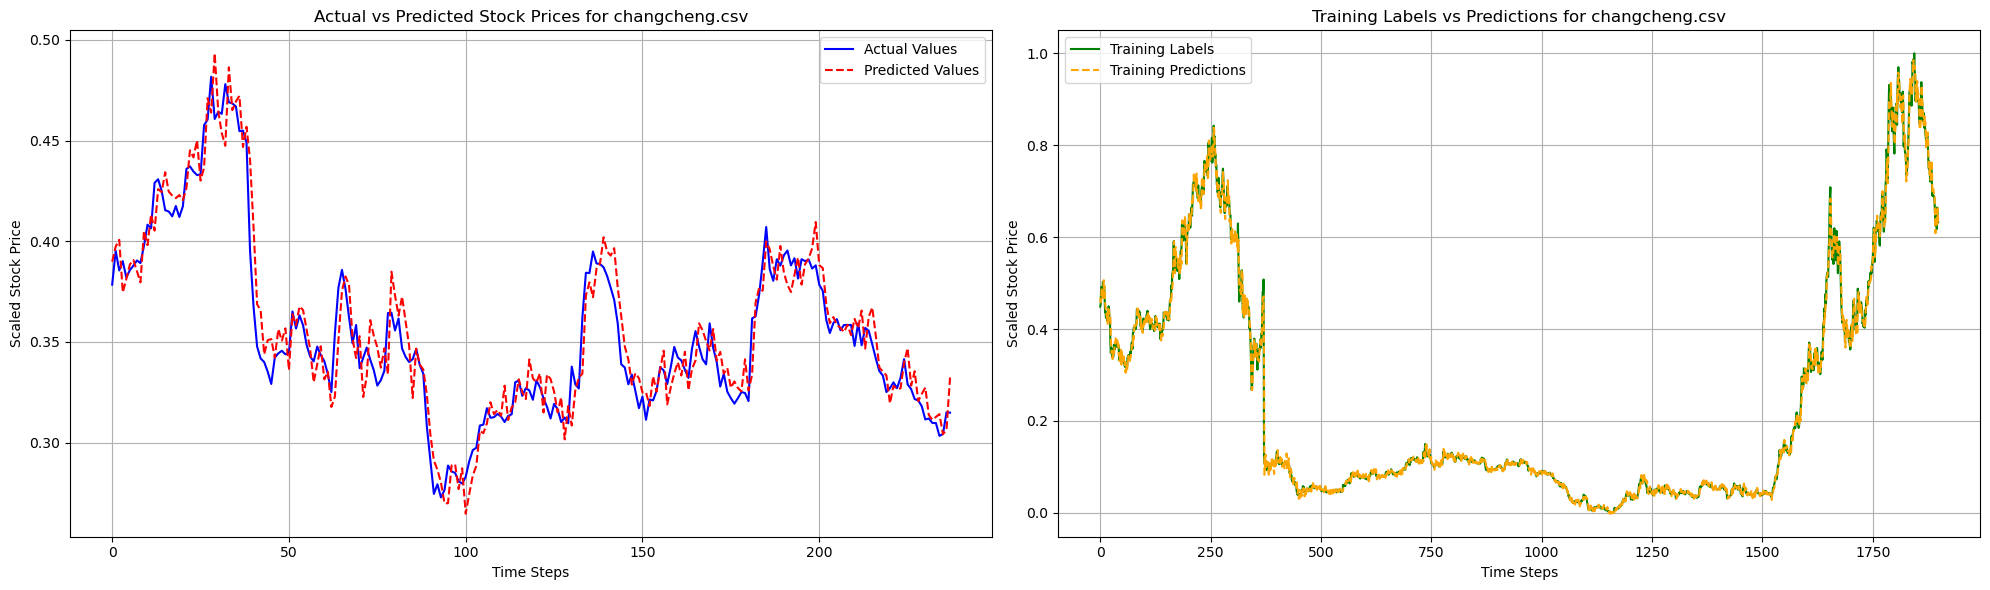

2024-11-28 22:05:04,332 - INFO - Model saved to sanyi.csv_linear_regression_model.pkl


Processing file: sanyi.csv
File: sanyi.csv
Linear Regression模型的MSE是: 0.000064
Linear Regression模型的RMSE是: 0.007971
Linear Regression模型的MAE是: 0.006014
Linear Regression模型的MAPE是: 0.022567
Linear Regression模型的R^2是: 0.947960
--------------------------------------------------


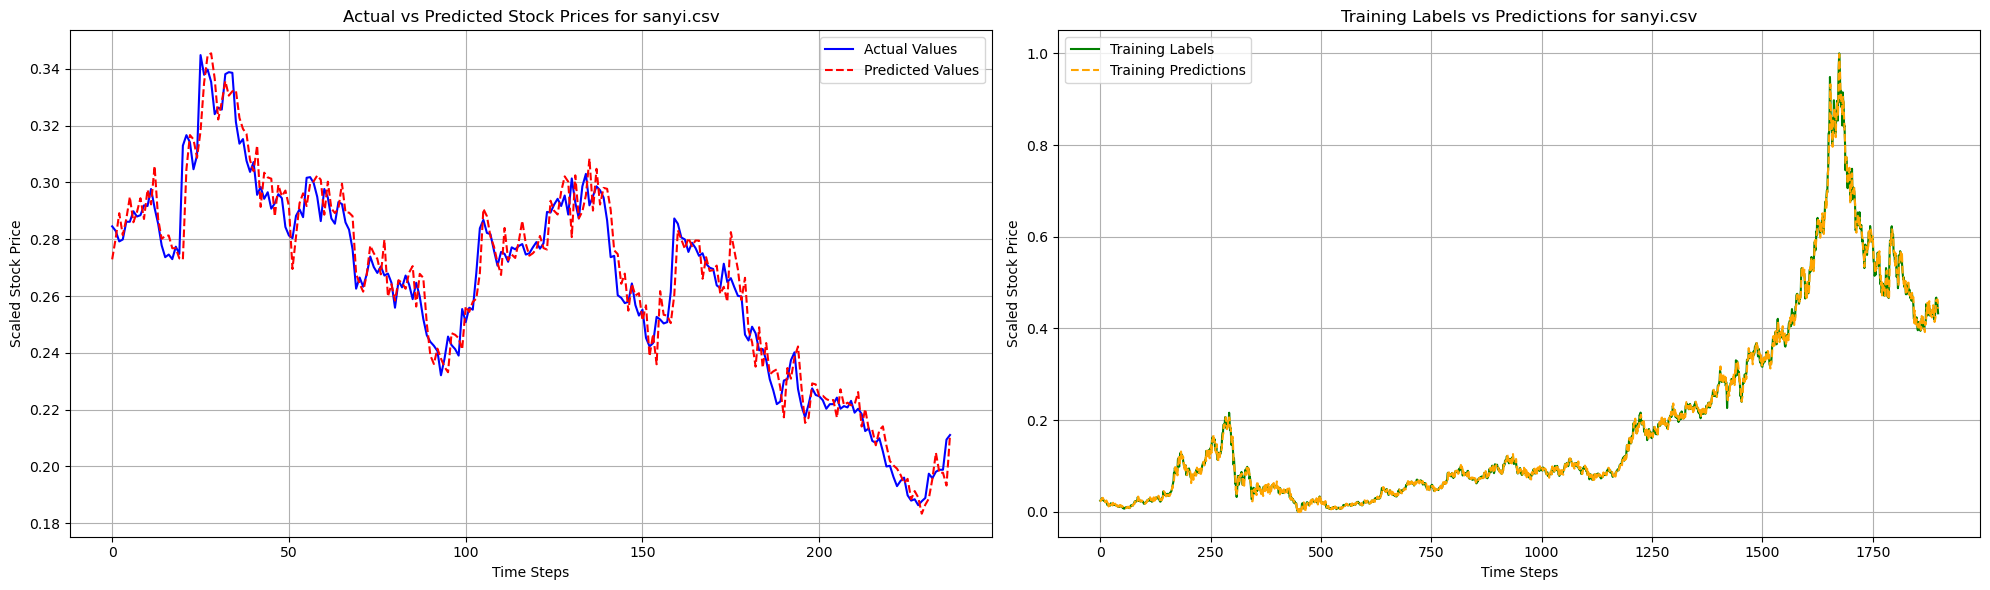

2024-11-28 22:05:04,669 - INFO - Model saved to hengrui.csv_linear_regression_model.pkl


Processing file: hengrui.csv
File: hengrui.csv
Linear Regression模型的MSE是: 0.000170
Linear Regression模型的RMSE是: 0.013053
Linear Regression模型的MAE是: 0.009925
Linear Regression模型的MAPE是: 0.052813
Linear Regression模型的R^2是: 0.826604
--------------------------------------------------


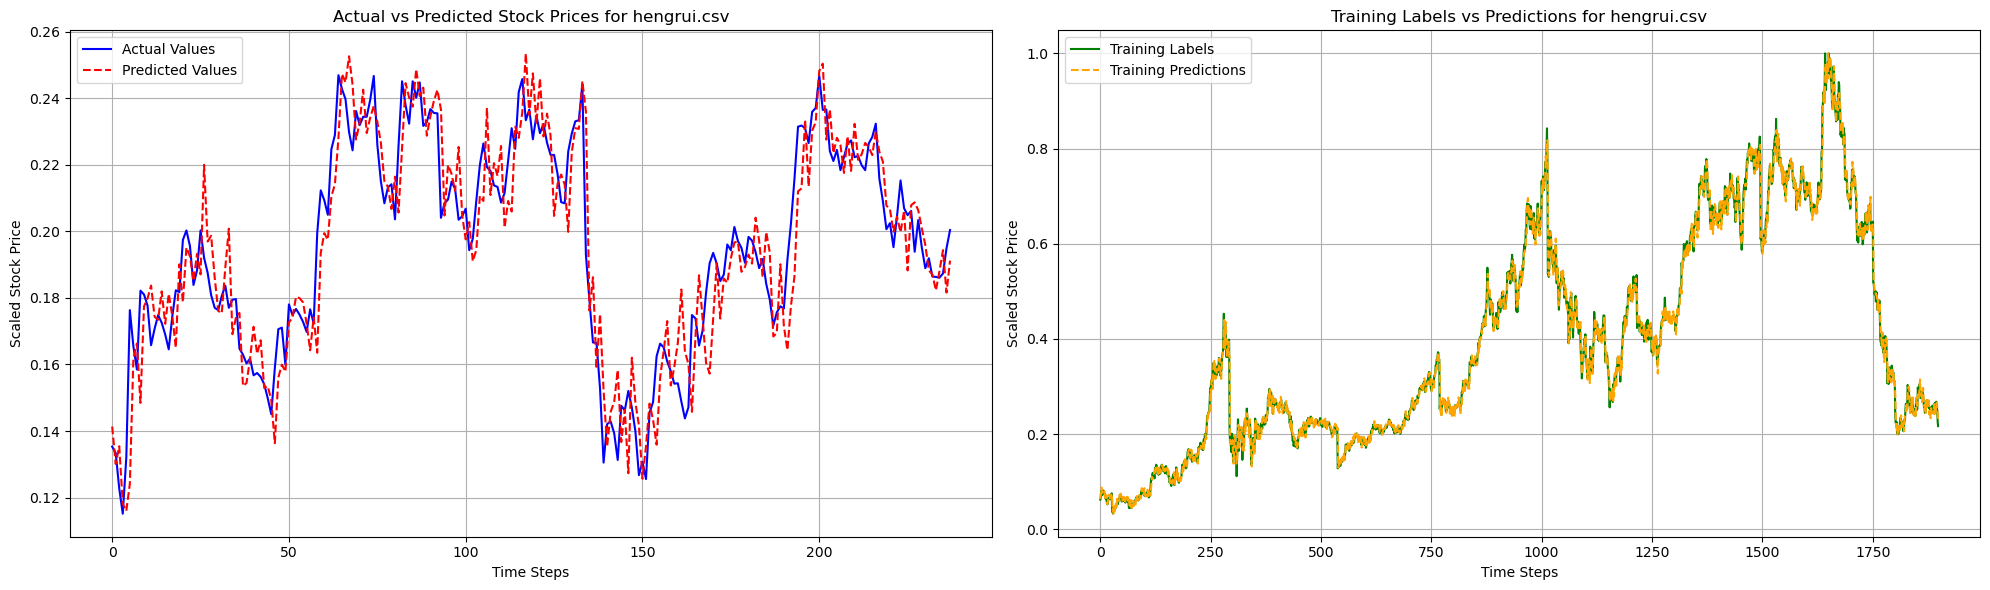

2024-11-28 22:05:04,971 - INFO - Model saved to zhongmian.csv_linear_regression_model.pkl


Processing file: zhongmian.csv
File: zhongmian.csv
Linear Regression模型的MSE是: 0.000141
Linear Regression模型的RMSE是: 0.011861
Linear Regression模型的MAE是: 0.009269
Linear Regression模型的MAPE是: 0.032851
Linear Regression模型的R^2是: 0.990388
--------------------------------------------------


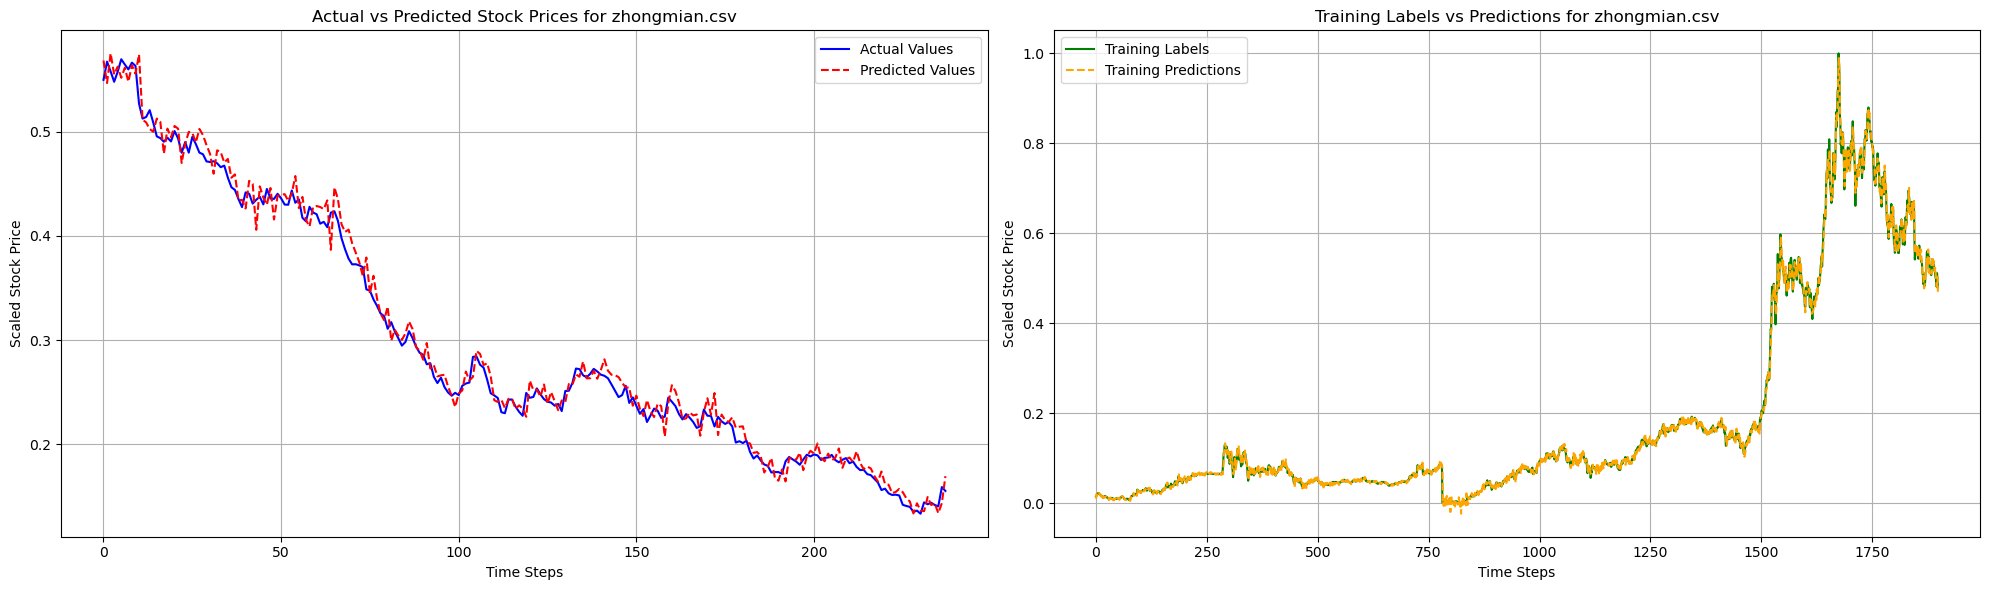

2024-11-28 22:05:05,302 - INFO - Model saved to beifangxitu.csv_linear_regression_model.pkl


Processing file: beifangxitu.csv
File: beifangxitu.csv
Linear Regression模型的MSE是: 0.000106
Linear Regression模型的RMSE是: 0.010294
Linear Regression模型的MAE是: 0.007699
Linear Regression模型的MAPE是: 0.025930
Linear Regression模型的R^2是: 0.964649
--------------------------------------------------


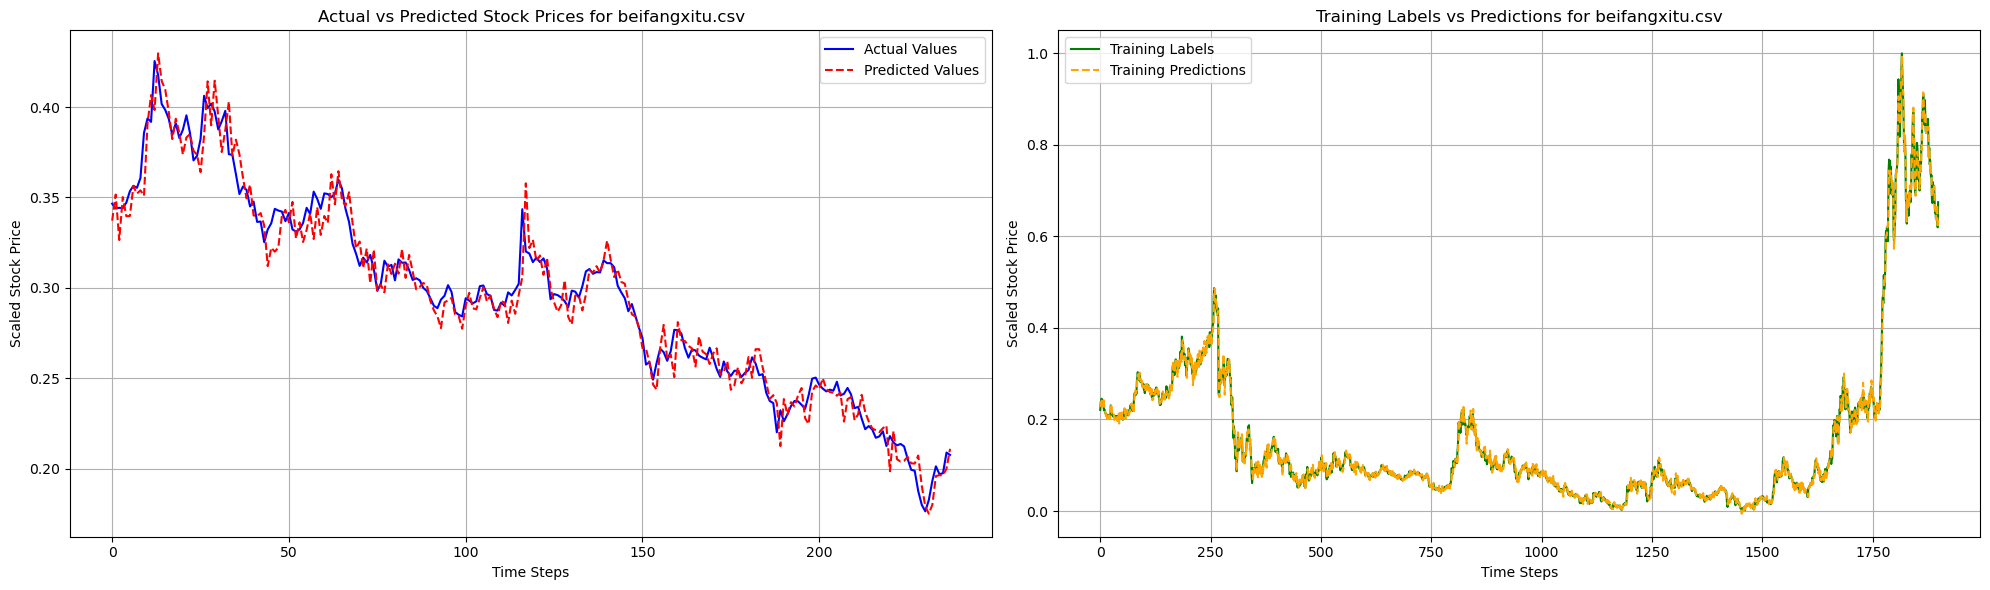

2024-11-28 22:05:05,705 - INFO - Model saved to hangfa.csv_linear_regression_model.pkl


Processing file: hangfa.csv
File: hangfa.csv
Linear Regression模型的MSE是: 0.000150
Linear Regression模型的RMSE是: 0.012227
Linear Regression模型的MAE是: 0.009663
Linear Regression模型的MAPE是: 0.026225
Linear Regression模型的R^2是: 0.954205
--------------------------------------------------


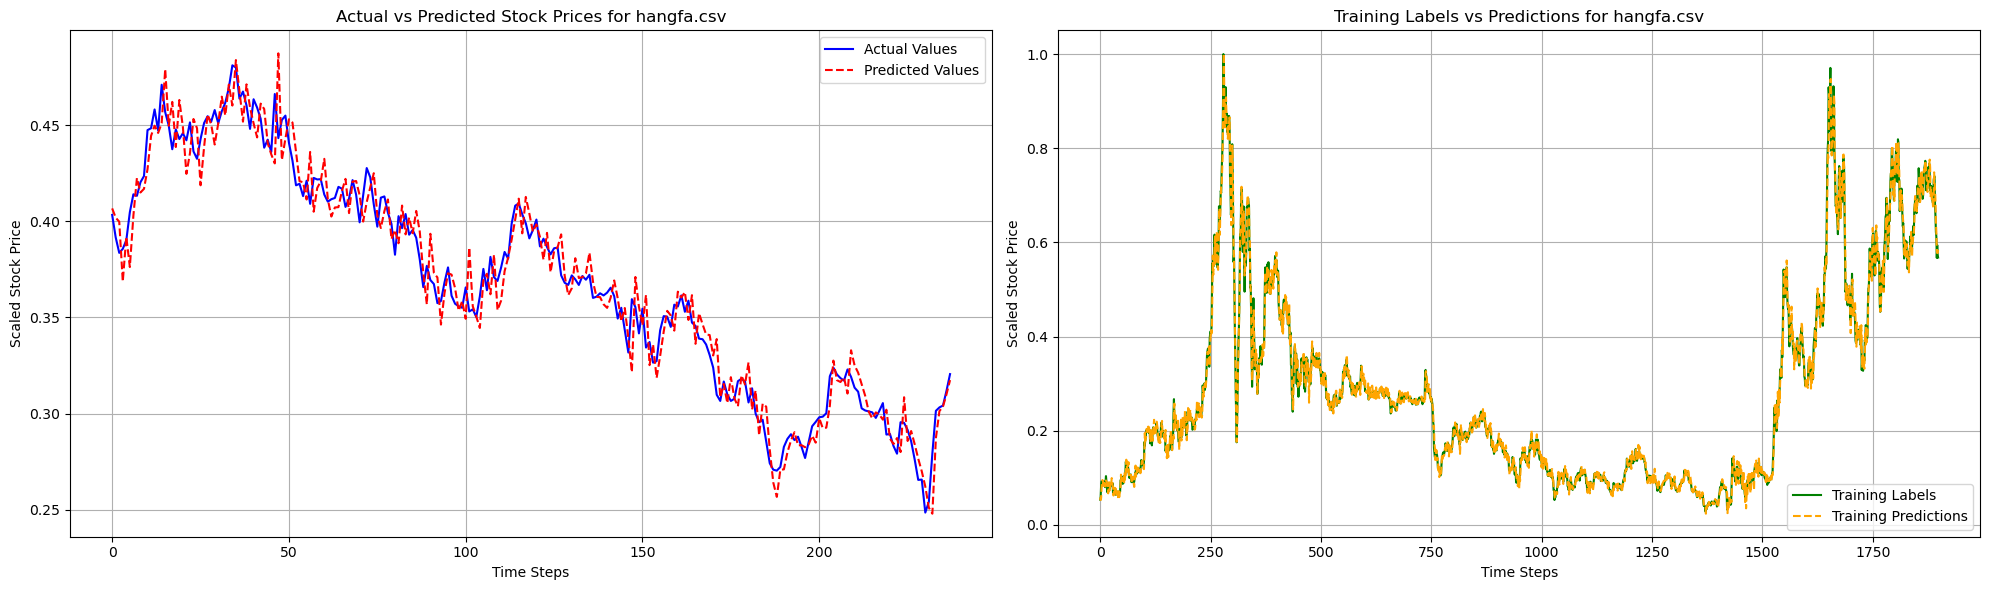

2024-11-28 22:05:06,107 - INFO - Model saved to yili.csv_linear_regression_model.pkl


Processing file: yili.csv
File: yili.csv
Linear Regression模型的MSE是: 0.000126
Linear Regression模型的RMSE是: 0.011211
Linear Regression模型的MAE是: 0.008762
Linear Regression模型的MAPE是: 0.021947
Linear Regression模型的R^2是: 0.946490
--------------------------------------------------


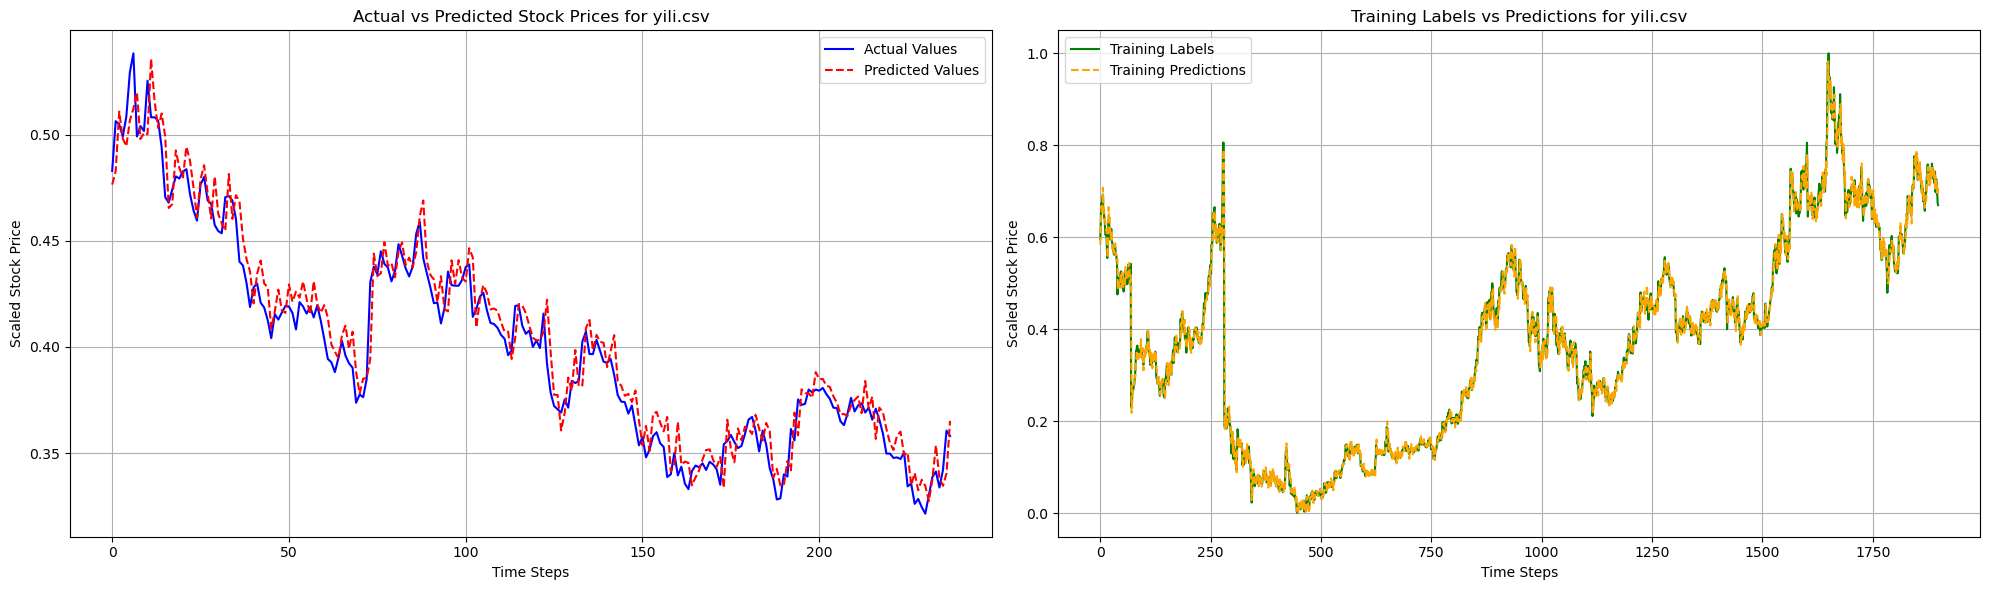

2024-11-28 22:05:06,429 - WARNING - File yaoyi.csv has too many missing values (average missing rate: 40.09%). Skipping file.
2024-11-28 22:05:06,484 - INFO - Model saved to nongyebank.csv_linear_regression_model.pkl


Processing file: yaoyi.csv
Processing file: nongyebank.csv
File: nongyebank.csv
Linear Regression模型的MSE是: 0.000418
Linear Regression模型的RMSE是: 0.020440
Linear Regression模型的MAE是: 0.014753
Linear Regression模型的MAPE是: 0.031888
Linear Regression模型的R^2是: 0.964204
--------------------------------------------------


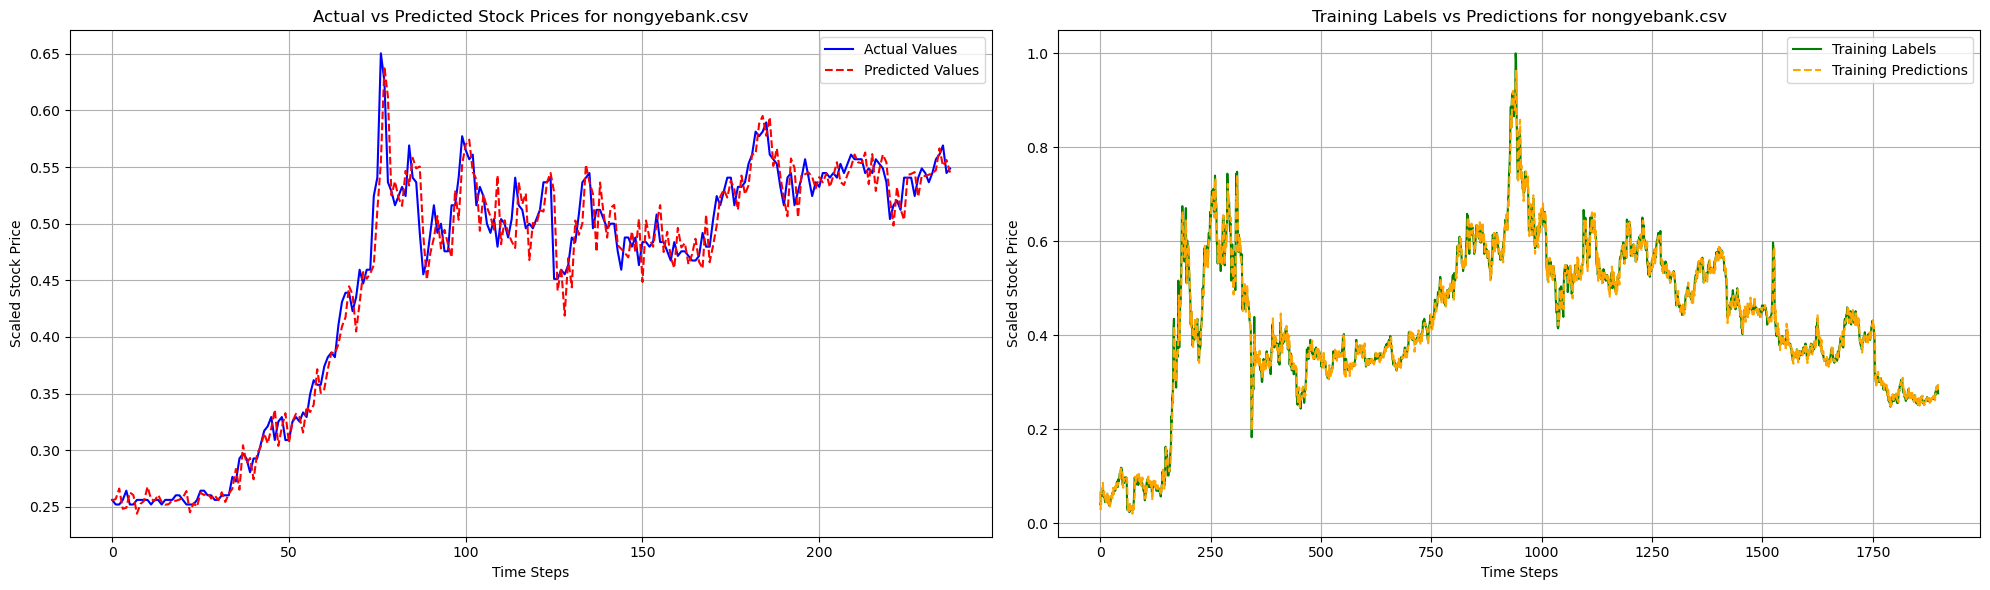

2024-11-28 22:05:06,814 - INFO - Model saved to tongwei.csv_linear_regression_model.pkl


Processing file: tongwei.csv
File: tongwei.csv
Linear Regression模型的MSE是: 0.000174
Linear Regression模型的RMSE是: 0.013198
Linear Regression模型的MAE是: 0.009824
Linear Regression模型的MAPE是: 0.021331
Linear Regression模型的R^2是: 0.977905
--------------------------------------------------


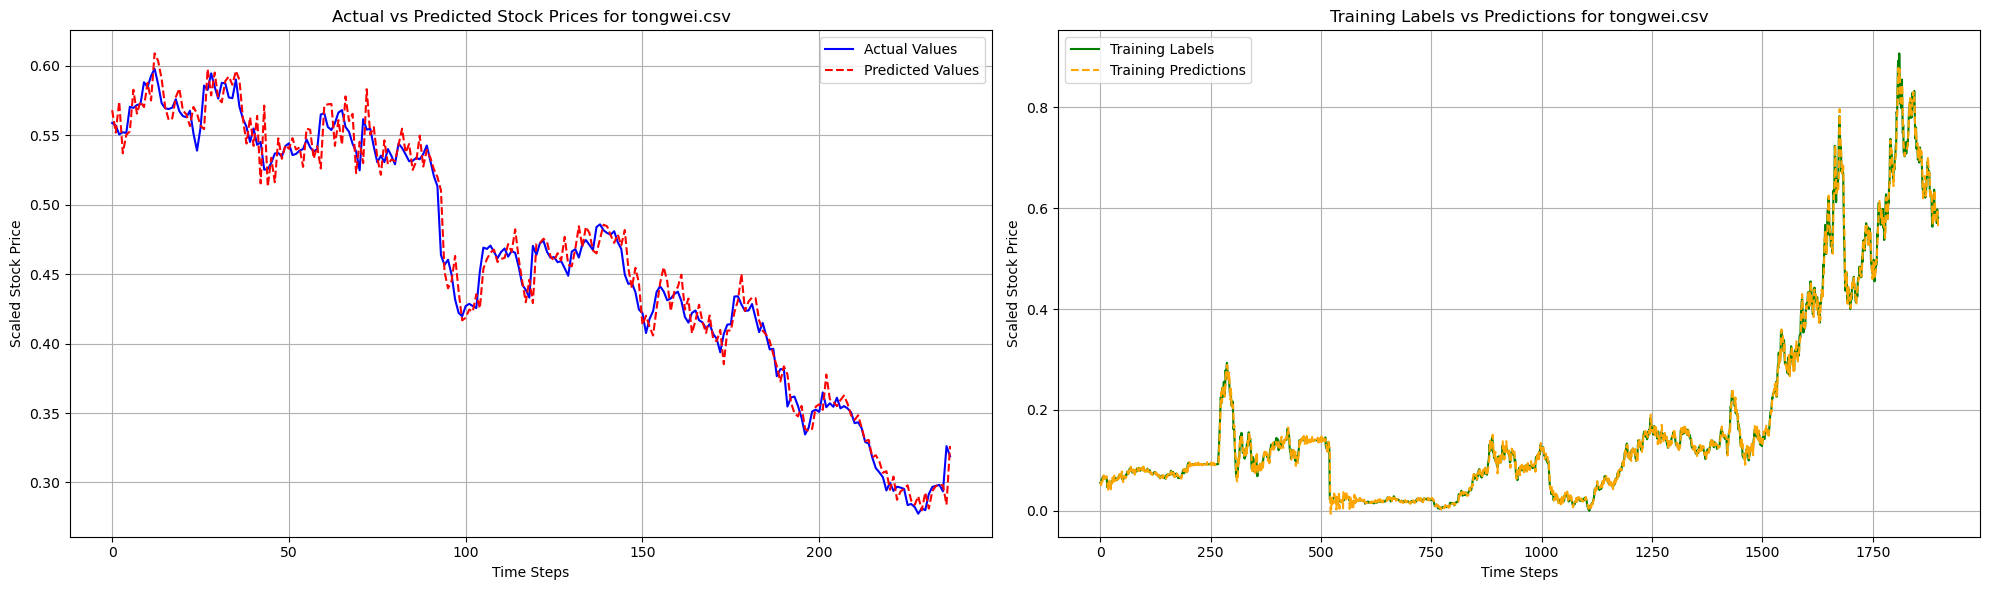

Processing file: shanximeiye.csv


2024-11-28 22:05:07,553 - INFO - Model saved to shanximeiye.csv_linear_regression_model.pkl


File: shanximeiye.csv
Linear Regression模型的MSE是: 0.000199
Linear Regression模型的RMSE是: 0.014101
Linear Regression模型的MAE是: 0.010289
Linear Regression模型的MAPE是: 0.013888
Linear Regression模型的R^2是: 0.923853
--------------------------------------------------


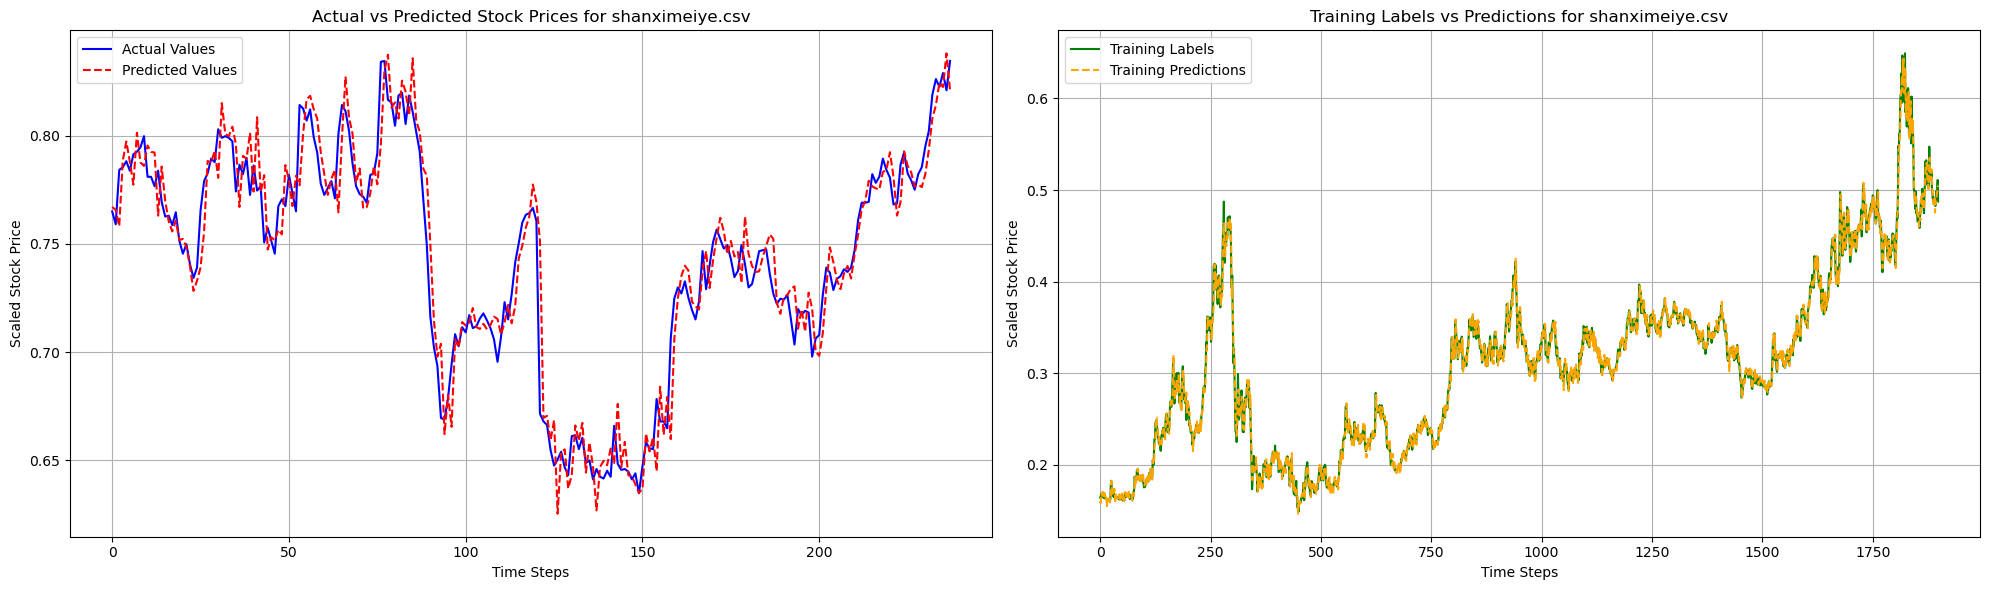

2024-11-28 22:05:07,883 - INFO - Model saved to zhongyuan.csv_linear_regression_model.pkl


Processing file: zhongyuan.csv
File: zhongyuan.csv
Linear Regression模型的MSE是: 0.000072
Linear Regression模型的RMSE是: 0.008511
Linear Regression模型的MAE是: 0.006350
Linear Regression模型的MAPE是: 0.025574
Linear Regression模型的R^2是: 0.829165
--------------------------------------------------


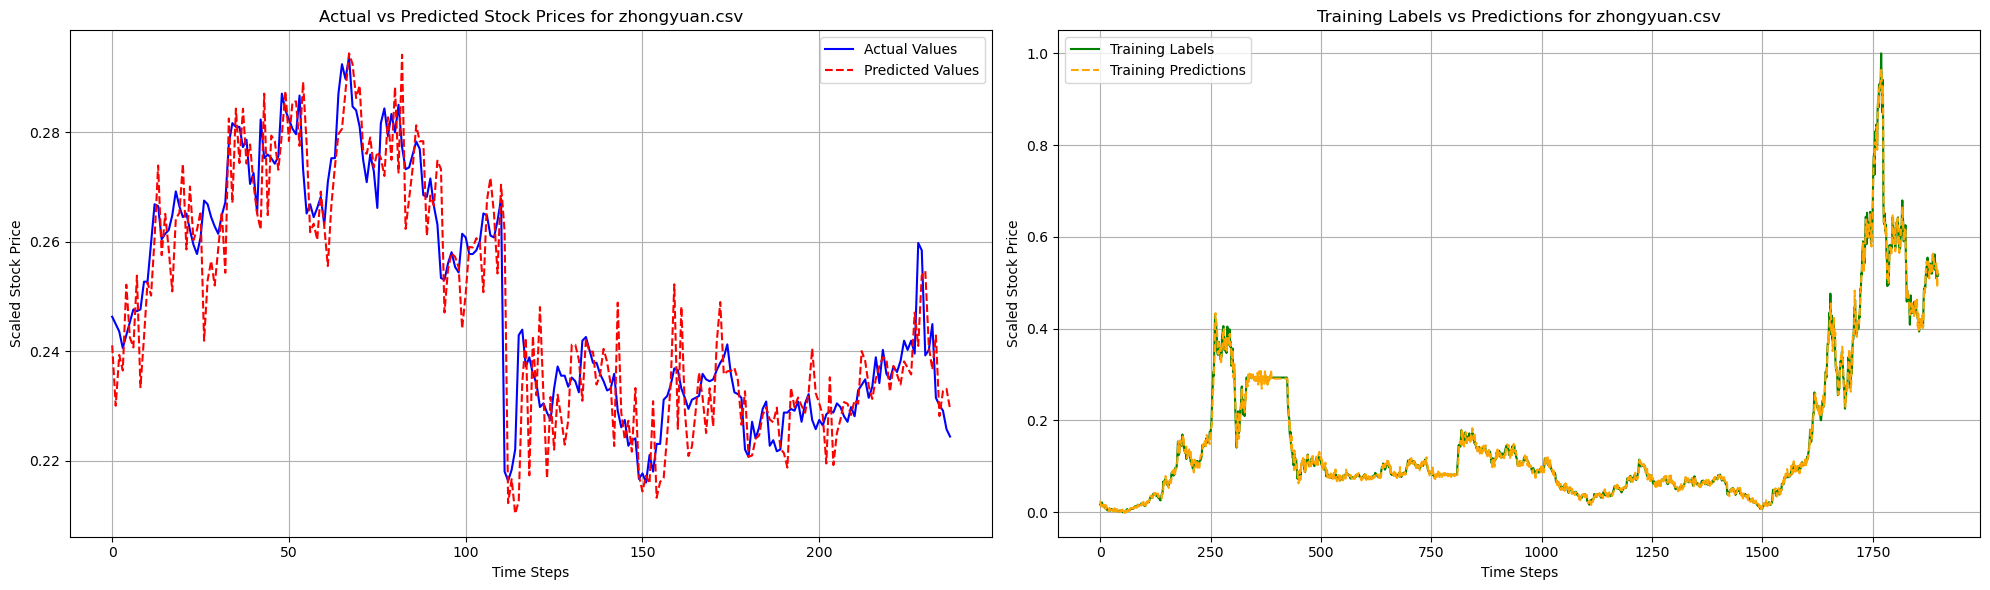

2024-11-28 22:05:08,182 - INFO - Model saved to zhaoshangbank.csv_linear_regression_model.pkl


Processing file: zhaoshangbank.csv
File: zhaoshangbank.csv
Linear Regression模型的MSE是: 0.000138
Linear Regression模型的RMSE是: 0.011752
Linear Regression模型的MAE是: 0.009291
Linear Regression模型的MAPE是: 0.018956
Linear Regression模型的R^2是: 0.965597
--------------------------------------------------


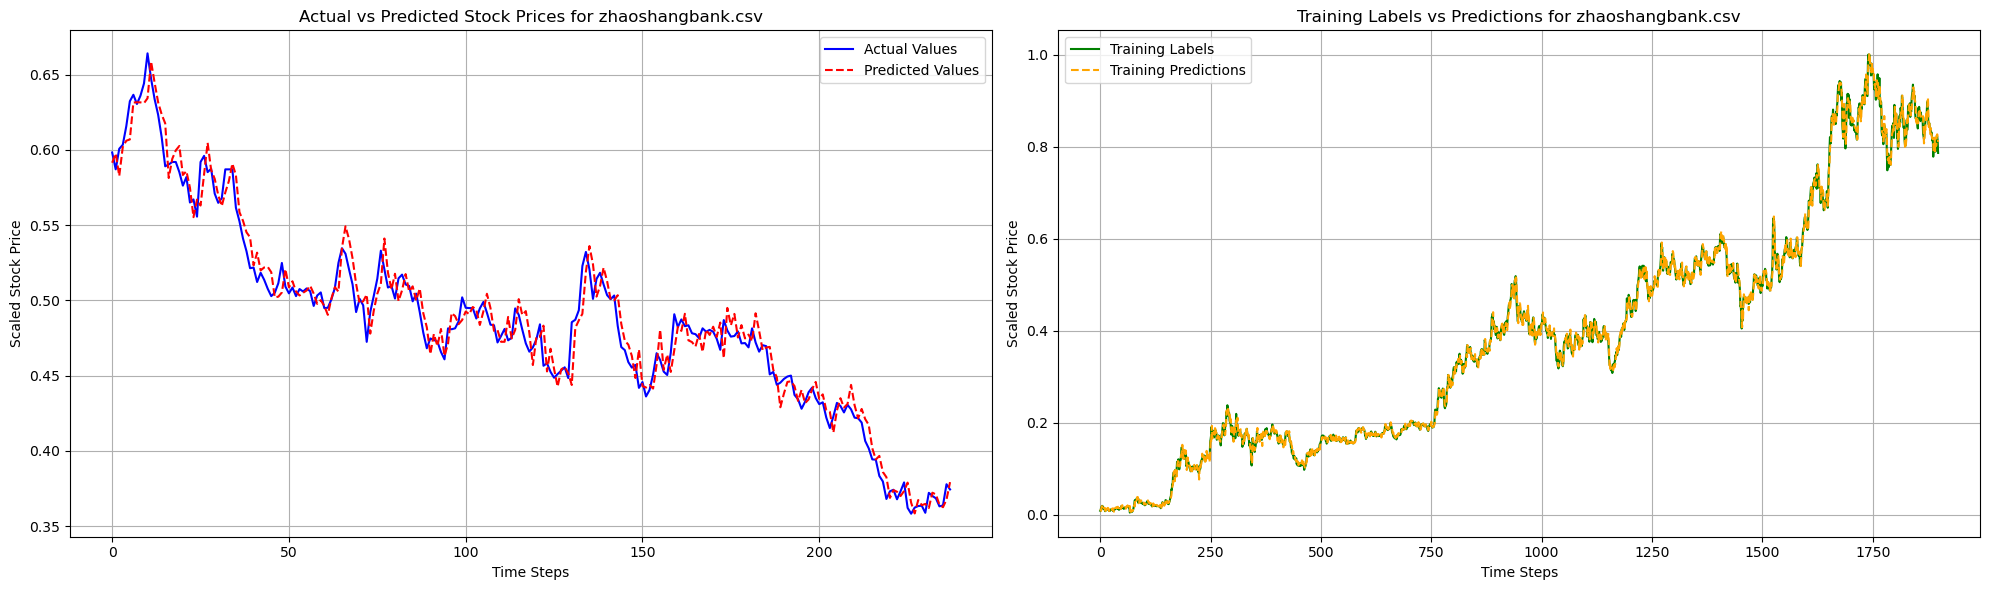

2024-11-28 22:05:08,412 - WARNING - File tianhe.csv has too many missing values (average missing rate: 70.35%). Skipping file.
2024-11-28 22:05:08,481 - INFO - Model saved to zhongguoshiyou.csv_linear_regression_model.pkl


Processing file: tianhe.csv
Processing file: zhongguoshiyou.csv
File: zhongguoshiyou.csv
Linear Regression模型的MSE是: 0.000273
Linear Regression模型的RMSE是: 0.016534
Linear Regression模型的MAE是: 0.012008
Linear Regression模型的MAPE是: 0.044418
Linear Regression模型的R^2是: 0.969821
--------------------------------------------------


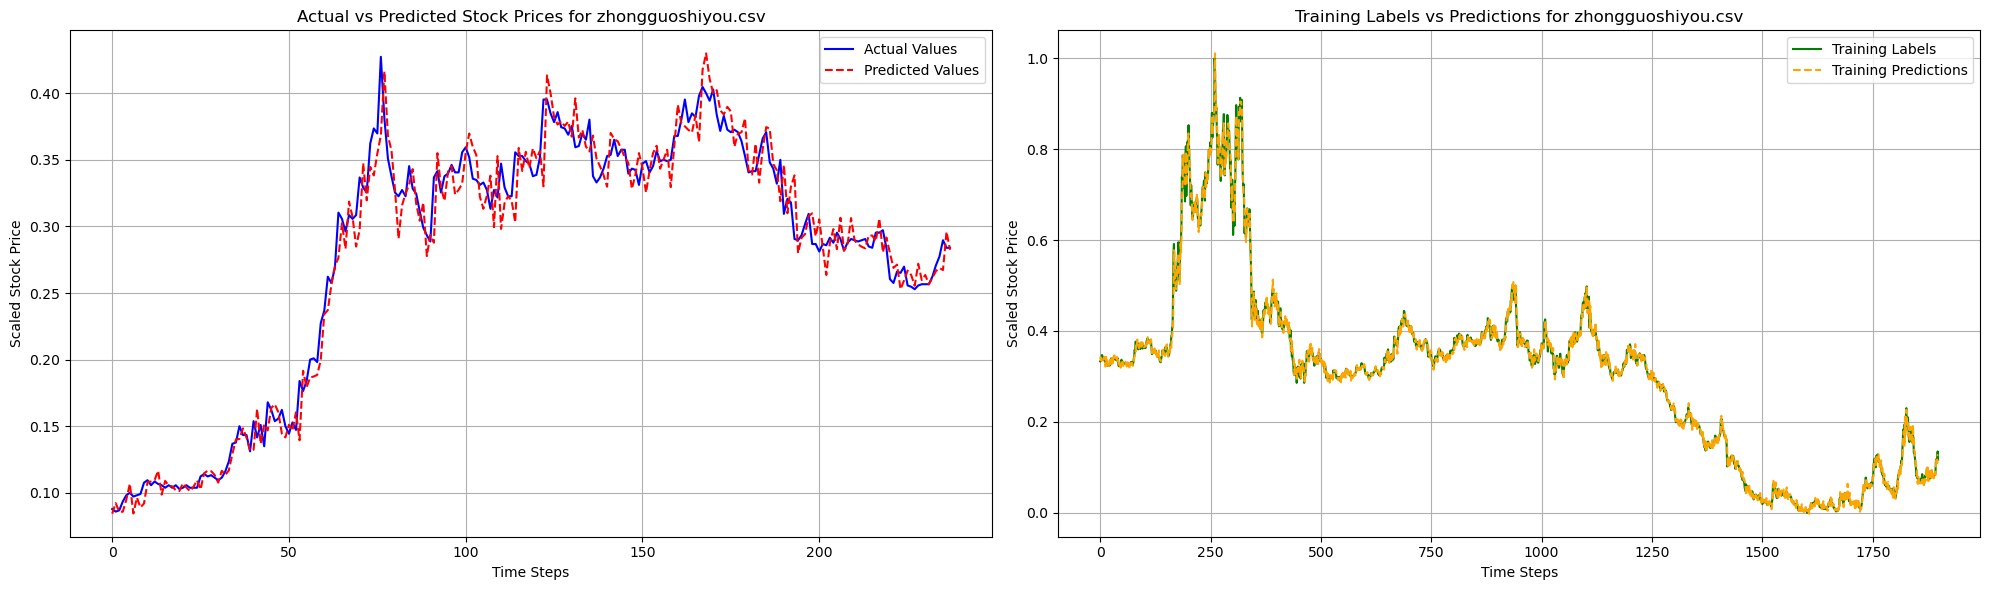

2024-11-28 22:05:08,832 - INFO - Model saved to dianjian.csv_linear_regression_model.pkl


Processing file: dianjian.csv
File: dianjian.csv
Linear Regression模型的MSE是: 0.000090
Linear Regression模型的RMSE是: 0.009496
Linear Regression模型的MAE是: 0.007196
Linear Regression模型的MAPE是: 0.033129
Linear Regression模型的R^2是: 0.977491
--------------------------------------------------


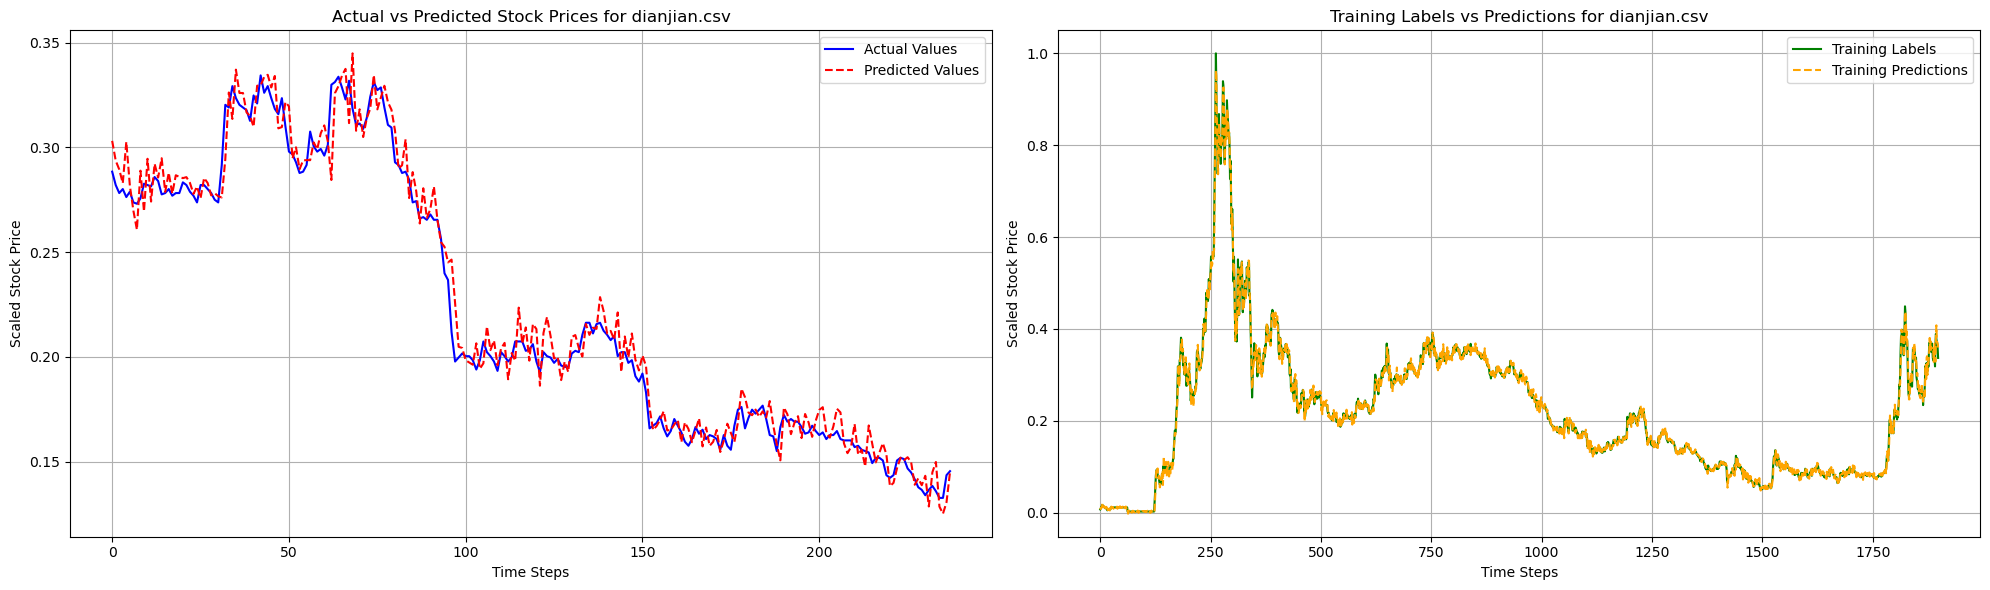

2024-11-28 22:05:09,130 - INFO - Model saved to gongshangbank.csv_linear_regression_model.pkl


Processing file: gongshangbank.csv
File: gongshangbank.csv
Linear Regression模型的MSE是: 0.000180
Linear Regression模型的RMSE是: 0.013427
Linear Regression模型的MAE是: 0.009279
Linear Regression模型的MAPE是: 0.028427
Linear Regression模型的R^2是: 0.917792
--------------------------------------------------


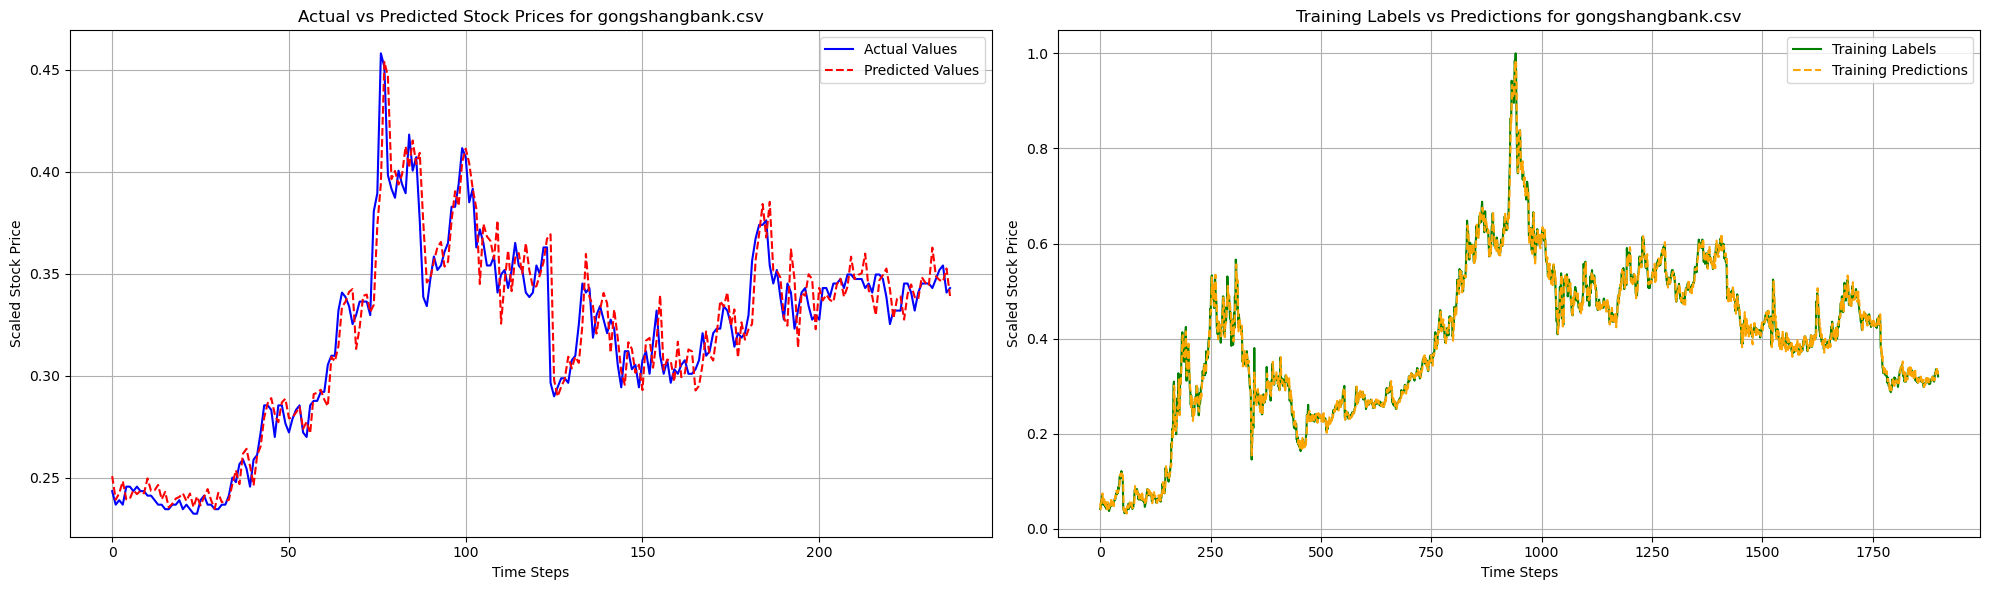

2024-11-28 22:05:09,463 - INFO - Model saved to zhongguoshihua.csv_linear_regression_model.pkl


Processing file: zhongguoshihua.csv
File: zhongguoshihua.csv
Linear Regression模型的MSE是: 0.000569
Linear Regression模型的RMSE是: 0.023856
Linear Regression模型的MAE是: 0.017718
Linear Regression模型的MAPE是: 0.046919
Linear Regression模型的R^2是: 0.969691
--------------------------------------------------


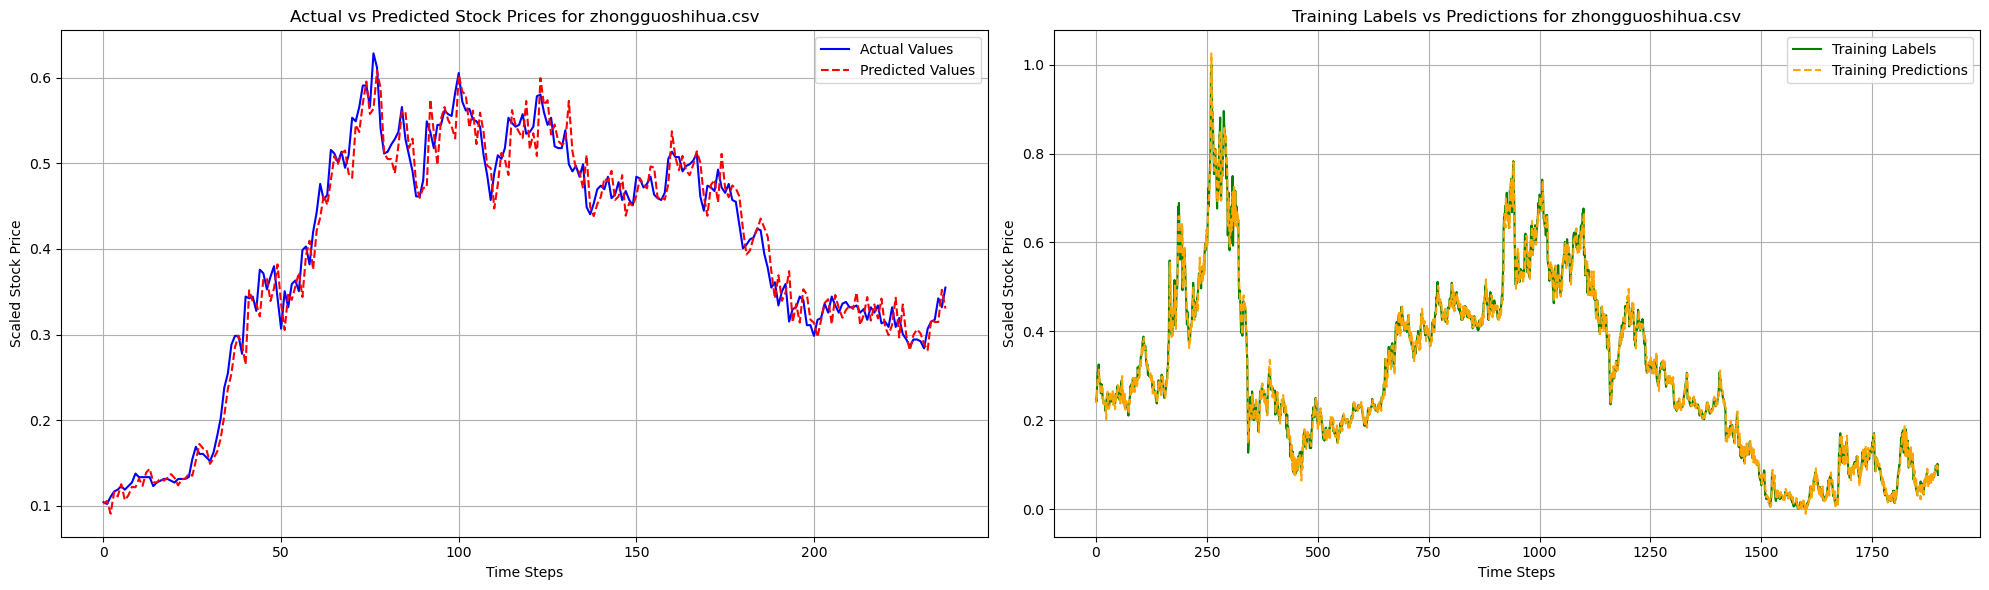

Processing file: fenjiu.csv


2024-11-28 22:05:10,087 - INFO - Model saved to fenjiu.csv_linear_regression_model.pkl


File: fenjiu.csv
Linear Regression模型的MSE是: 0.000224
Linear Regression模型的RMSE是: 0.014982
Linear Regression模型的MAE是: 0.012082
Linear Regression模型的MAPE是: 0.025796
Linear Regression模型的R^2是: 0.929884
--------------------------------------------------


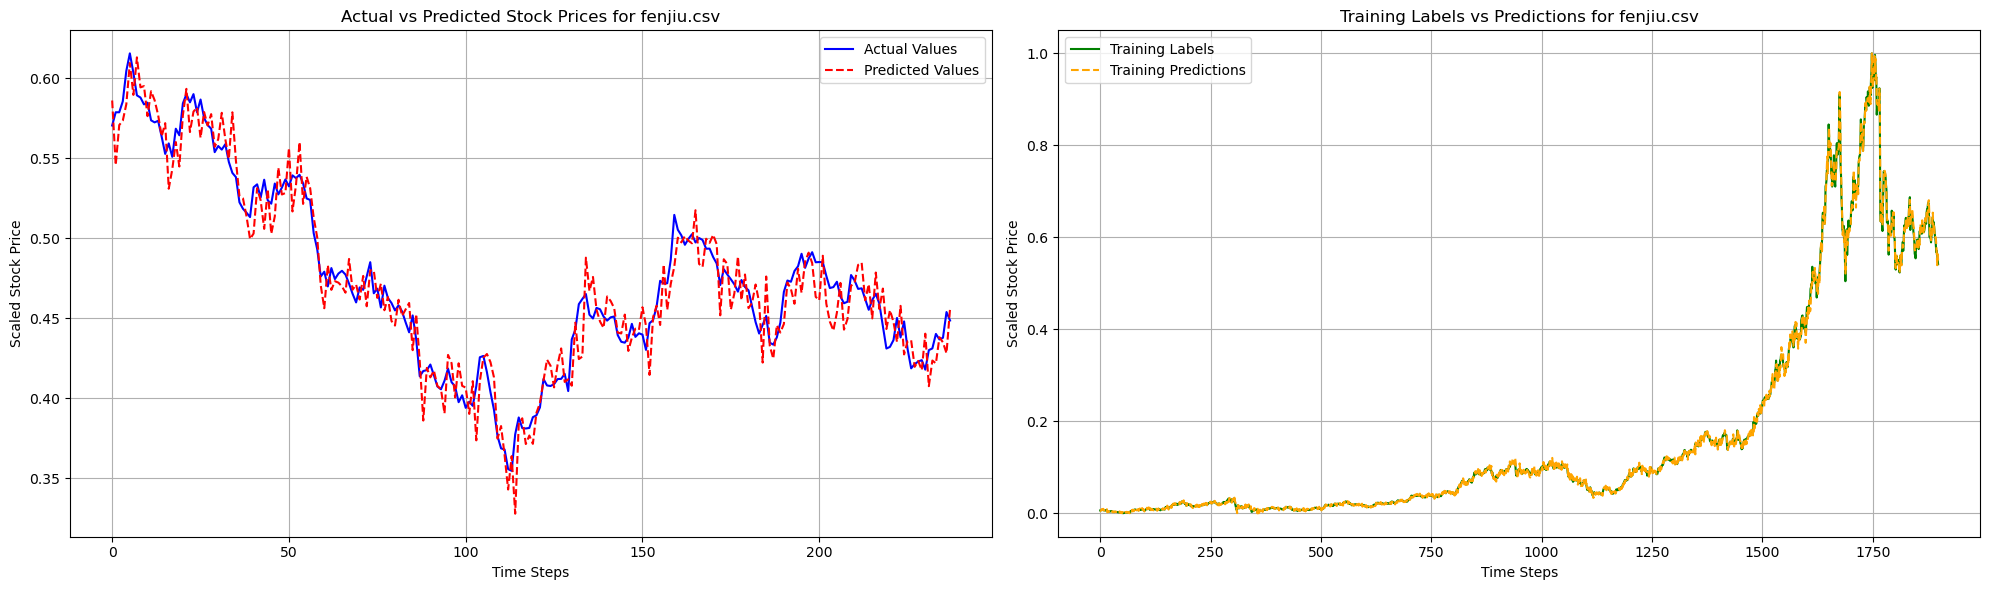

2024-11-28 22:05:10,365 - WARNING - File huayou.csv has too many missing values (average missing rate: 25.90%). Skipping file.


Processing file: huayou.csv


In [21]:
# Loop through each file and process it
valid_csv_files = []
for csv_file in csv_files:
    print(f'Processing file: {csv_file}')
    
    # Load the dataset
    data = pd.read_csv(os.path.join(data_dir, csv_file))

    # Drop the first two rows that contain non-relevant information
    if len(data) > 2:
        data_cleaned = data.drop([0, 1])
    else:
        data_cleaned = data

    # Reset index
    data_cleaned.reset_index(drop=True, inplace=True)

    # Convert columns to numeric where possible
    data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

    # Calculate the percentage of missing values in each column
    missing_percentage = (data_cleaned.isna() | (data_cleaned == 0)).mean() * 100

    # If the percentage of missing values is greater than a threshold (e.g., 30%), skip this file
    if missing_percentage.mean() > 25:
        logging.warning(f'File {csv_file} has too many missing values (average missing rate: {missing_percentage.mean():.2f}%). Skipping file.')
        continue

    # If dropping rows with NaN values results in insufficient data, skip the cleaning step
    if data_cleaned.dropna().shape[0] >= 60:
        data_cleaned.dropna(inplace=True)

    # Select features for scaling (assuming columns 1 to 5 are relevant features)
    all_data = data_cleaned.iloc[:, 1:6]

    if all_data.shape[1] < 5:
        logging.warning(f'File {csv_file} has insufficient numeric columns for processing. Skipping file.')
        continue

    valid_csv_files.append(csv_file)
    
    # Feature scaling using MinMaxScaler
    sc = MinMaxScaler(feature_range=(0, 1))
    all_data_scaled = sc.fit_transform(all_data)

    # Prepare features and labels with a time step of 60
    timestep = 60
    features = []
    labels = []
    for i in range(timestep, len(all_data_scaled)):
        features.append(all_data_scaled[i-timestep:i, :])
        labels.append(all_data_scaled[i, 1])  # Using the second column as the label

    features, labels = np.array(features), np.array(labels)

    # Reshape features for linear regression (flattening)
    features = features.reshape(features.shape[0], -1)

    # Split the dataset into training, validation, and test sets (8:1:1 ratio)
    x_train, x_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.2, shuffle=False)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=False)

    # Train a Linear Regression model
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    # Save the trained model
    model_filename = f'{csv_file}_linear_regression_model.pkl'
    joblib.dump(regressor, os.path.join(data_dir, model_filename))
    logging.info(f'Model saved to {model_filename}')

    # Predict on test set
    if len(y_test) > 0:  # Only proceed if there is test data
        predicted_stock_test = regressor.predict(x_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, predicted_stock_test)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_test, predicted_stock_test)
        mape = mean_absolute_percentage_error(y_test, predicted_stock_test)
        r2 = r2_score(y_test, predicted_stock_test)

        # Add metrics to summary DataFrame
        metrics_summary = pd.concat([metrics_summary, pd.DataFrame([{
            'File': csv_file,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2
        }])], ignore_index=True)

        # Print evaluation results
        print(f'File: {csv_file}')
        print('Linear Regression模型的MSE是: %.6f' % mse)
        print('Linear Regression模型的RMSE是: %.6f' % rmse)
        print('Linear Regression模型的MAE是: %.6f' % mae)
        print('Linear Regression模型的MAPE是: %.6f' % mape)
        print('Linear Regression模型的R^2是: %.6f' % r2)
        print('-' * 50)

        # Data Visualization
        # Plotting Actual vs Predicted values and Training vs Predictions in one row
        fig, axs = plt.subplots(1, 2, figsize=(20, 6))
        
        # Plotting the Actual vs Predicted values
        axs[0].plot(y_test, color='blue', label='Actual Values')
        axs[0].plot(predicted_stock_test, color='red', linestyle='--', label='Predicted Values')
        axs[0].set_title(f'Actual vs Predicted Stock Prices for {csv_file}')
        axs[0].set_xlabel('Time Steps')
        axs[0].set_ylabel('Scaled Stock Price')
        axs[0].legend()
        axs[0].grid(True)
        
        # Plotting Training and Validation Loss
        axs[1].plot(y_train, color='green', label='Training Labels')
        axs[1].plot(regressor.predict(x_train), color='orange', linestyle='--', label='Training Predictions')
        axs[1].set_title(f'Training Labels vs Predictions for {csv_file}')
        axs[1].set_xlabel('Time Steps')
        axs[1].set_ylabel('Scaled Stock Price')
        axs[1].legend()
        axs[1].grid(True)
        
        # Show the combined figure
        plt.tight_layout()
        plt.show()

In [22]:
valid_csv_files

['taibao.csv',
 'shenhua.csv',
 'haier.csv',
 'zhongguochuanbo.csv',
 'longji.csv',
 'changjiangdianli.csv',
 'xingyebank.csv',
 'zhongguojianzhu.csv',
 'haitian.csv',
 'baoli.csv',
 'shangqi.csv',
 'renshou.csv',
 'pingan.csv',
 'zijin.csv',
 'pianzai.csv',
 'zhongxinzhengquan.csv',
 'wanhua.csv',
 'zhongtie.csv',
 'maotai.csv',
 'tebian.csv',
 'liantong.csv',
 'guodiannanrui.csv',
 'changcheng.csv',
 'sanyi.csv',
 'hengrui.csv',
 'zhongmian.csv',
 'beifangxitu.csv',
 'hangfa.csv',
 'yili.csv',
 'nongyebank.csv',
 'tongwei.csv',
 'shanximeiye.csv',
 'zhongyuan.csv',
 'zhaoshangbank.csv',
 'zhongguoshiyou.csv',
 'dianjian.csv',
 'gongshangbank.csv',
 'zhongguoshihua.csv',
 'fenjiu.csv']

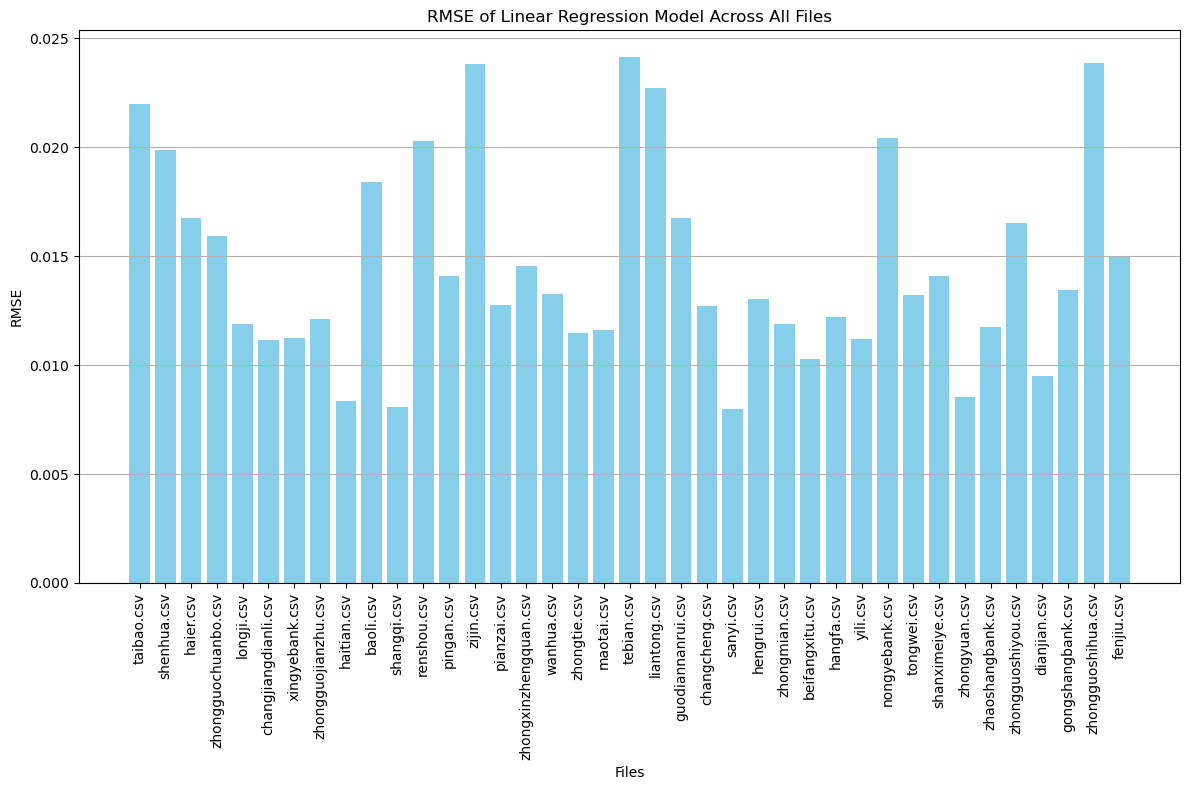

In [ ]:
# Overall Data Analysis
# Plotting summary metrics for all files
if not metrics_summary.empty:
    plt.figure(figsize=(12, 8))
    plt.bar(metrics_summary['File'], metrics_summary['RMSE'], color='skyblue')
    plt.title('RMSE of Linear Regression Model Across All Files')
    plt.xlabel('Files')
    plt.ylabel('RMSE')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.bar(metrics_summary['File'], metrics_summary['R2'], color='lightgreen')
    plt.title('R² Score of Linear Regression Model Across All Files')
    plt.xlabel('Files')
    plt.ylabel('R² Score')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()